<a href="https://colab.research.google.com/github/abduladebogun/colorectal-cancer-survival-predictor/blob/main/colorectal_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents:

[1. Data Import , Cleanind and Pre-processing](#1-data-cleaning-and-pre-processing)  


[2. Exploratory Data Analysis](#2-exploratory-data-analysis)  


[3. Feature Selection](#3-feature-selection)
- [3.1 Categorical Variables](#31-categorical-variables)  
- [3.2 Numerical Variables](#32-numerical-variables)  

[4. Model Selection and Optimization](#4-model-selection-and-optimization)
- [4.1 Model Selection](#41-model-selection)
- [4.2 Model Optimization](#42-model-optimization)   
    - [4.2.1 KNN](#421-KNN)   
    - [4.2.2 Decision Trees](#422-Decision-Trees)   
    - [4.2.3 Neural Networks](#423-Neural-Networks)  




[5. Model Deployment](#5-Model-deployment)




# 1. Data Import and Integration

This is the first section of the project, that has the following steps:

- connect the project to Google drive to access the csv filr that contains the project dataset
- import the pandas library. Other libraries used in the project will be imported here
- read the project data from the csv file in Google drive
- Verify that the steps above are correctly implemented


## Import Pandas and Other Libraries
This cell contains all necessary import statements for the project. It begins with importing `pandas`, which is essential for reading data from Google drive into a dataframe.

As the project progresses, additional required libraries will be imported here for centralized access and clarity.




In [1]:

import pandas as pd



## Connect to Google Drive
Next is to mount google drive so as to have access to the csv file on it.

This is needed because this project notebook and csv dataset are both on google drive.

In [4]:
# mounting google drive, and defining path to project dataset file(s)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Portfolio/Machine Learning/Colorectal Cancer Survival Predictor/'

Mounted at /content/drive


## Read Data into Dataframe

Using the pandas library, the dataset in the csv is read into a dataframe.

The dataframe then allows working with the data using Python.

In [8]:
# reading the dataset from a csv file, creating a dataframe and assigning to a variable

df = pd.read_csv(path + '/patient_data.csv')

## Check if Everything Works
Lets see whats inside the dataframe

In [7]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75035 entries, 0 to 75034
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75035 non-null  int64  
 1   Alcohol Consumption         74983 non-null  object 
 2   Cancer Stage                75022 non-null  object 
 3   Country                     74985 non-null  object 
 4   Date of Birth               74975 non-null  object 
 5   Diabetes                    75021 non-null  object 
 6   Diabetes History            75035 non-null  object 
 7   Diet Risk                   74987 non-null  object 
 8   Early Detection             75005 non-null  object 
 9   Family History              74989 non-null  object 
 10  Gender                      74956 non-null  object 
 11  Genetic Mutation            75005 non-null  object 
 12  Healthcare Access           74972 non-null  object 
 13  Healthcare Costs            749

The outputs of the head() and info() method show that all the steps in this section were successfully executed.

Initial observations:

- The dataset has 32 columns and 75035 entries
- The columns are of diverse datatypes, namely: int64, float64, object
- most/all the columns have null values
- Marital Status column is completely made up of null values

These observations will drive the first data cleaning iteration

# Exploratory Data Analysis
The goal of this section is to explore the data with the aim of getting major insights.

During this exploration, irregularities in the data are also exposed.

This section is critical to the whole project, as it serves as the tone for the rest of the project.

## Data Cleaning I

- Removal of ID and Marital Status columns
- Handling null values

In [ ]:
# remove ID and Marital Status columns

df = df.drop(columns=['ID', 'Marital Status'], axis=1)

2-step handling of Null values as follows:
- First, we'll check if rows with null values are sizable percentage of the dataset
- if yes, we'll remove rows with more than 5 missing values and fill the remaining empty cells
- if no, we will drop all rows with missing values

In [ ]:
# Percentage of dataset that would be lost if rows with nulls are dropped

data_loss_per = (df.isnull().any(axis=1).sum() / len(df)) * 100
print(f"Percentage of dataset to be lost if rows with null values are dropped: {data_loss_per:.2f}%")

Percentage of dataset to be lost if rows with null values are dropped: 1.48%


1.48% of the dataset is negligible, so we drop all rows with null values

In [ ]:
# drop all rows with null values.

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73926 entries, 0 to 75034
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol Consumption         73926 non-null  object 
 1   Cancer Stage                73926 non-null  object 
 2   Country                     73926 non-null  object 
 3   Date of Birth               73926 non-null  object 
 4   Diabetes                    73926 non-null  object 
 5   Diabetes History            73926 non-null  object 
 6   Diet Risk                   73926 non-null  object 
 7   Early Detection             73926 non-null  object 
 8   Family History              73926 non-null  object 
 9   Gender                      73926 non-null  object 
 10  Genetic Mutation            73926 non-null  object 
 11  Healthcare Access           73926 non-null  object 
 12  Healthcare Costs            73926 non-null  float64
 13  Heart Disease History       73926 no

##Dataset Observation II

In [ ]:
# observing the first five rows using head()

print(df.head())

  Alcohol Consumption Cancer Stage Country Date of Birth Diabetes  \
0                  No    Localized      UK    29-01-1966       No   
1                  No     Regional   Japan    21-12-1958       No   
2                  No    Localized  France    16-06-1959       No   
3                 Yes    Localized   Japan    18-01-1956      Yes   
4                  No     Regional     USA    04-05-1975       No   

  Diabetes History Diet Risk Early Detection Family History Gender  ...  \
0               No  Moderate              No             No      M  ...   
1               No       Low              No             No      M  ...   
2               No       Low             Yes             No      M  ...   
3               No  Moderate              No             No      M  ...   
4               No  Moderate             Yes            Yes      M  ...   

  Non Smoker Obesity BMI  Physical Activity Screening History Smoking History  \
0        Yes  Overweight                Low          

The following observations were made:
- Most columns have categorical values
- The 'Date of Birth' column should be in datetime format
- The 'Transfusion History' column seems to have meaningless values

##Data Cleaning II

- Take a closer look at 'Transfusion History' column. Delete if necessary
- Check categorical columns for categorisation errors. Handle if seen.

In [ ]:
# transfusion history

df['Transfusion History'].value_counts()

,count
Transfusion History,
-,73926


all the cells in 'Transfusion History' column contain -, so the column isn't usable.

The column will be removed accordingly

In [ ]:
df.drop(columns=['Transfusion History'], axis=1, inplace=True)

Next is to check categorical columns for categorisation errors, and will be handled if seen.

In [ ]:
# prompt: looping through the categorical columns and printing the categories of each column

for col in df.select_dtypes(include=['object']).columns:
  print(f"Categories for column '{col}':")
  print(df[col].value_counts())
  print("-" * 30)

Categories for column 'Alcohol Consumption':
Alcohol Consumption
No     36990
Yes    36936
Name: count, dtype: int64
------------------------------
Categories for column 'Cancer Stage':
Cancer Stage
Regional      29436
Localized     29379
Metastatic    15111
Name: count, dtype: int64
------------------------------
Categories for column 'Country':
Country
USA             11486
China            7775
Japan            6301
South Korea      6196
Germany          5424
UK               5374
France           4630
India            4609
Brazil           4540
Canada           3920
Italy            3875
Australia        2972
South Africa     2309
Nigeria          1534
Pakistan         1524
New Zealand      1457
Name: count, dtype: int64
------------------------------
Categories for column 'Date of Birth':
Date of Birth
11-01-1952    19
09-06-1949    19
25-11-1962    18
02-01-1969    17
13-01-1952    17
              ..
11-12-1990     1
20-12-1985     1
24-03-1985     1
17-07-1990     1
31-03-1976 

 - `Urban or Rural` column has case disparity
 - `Healthcare Access` has a column named '?' with 16 values
 - `Gender` has a P column with just 8 values

In [ ]:
# change all values in Urban or Rural column to title case

df['Urban or Rural'] = df['Urban or Rural'].str.title()
df['Urban or Rural'].value_counts()

,count
Urban or Rural,
Urban,51785
Rural,22141


In [ ]:
# remove '?' values in 'Healthcare Access' and 'P' in 'Gender', and forward fill

df['Healthcare Access'] = df['Healthcare Access'].replace('?', np.nan)
df['Gender'] = df['Gender'].replace('P', np.nan)
df.fillna(method='ffill', inplace=True)

# Verify the changes
print(df['Healthcare Access'].value_counts())
print(df['Gender'].value_counts())

Healthcare Access
Moderate    36672
High        22351
Low         14903
Name: count, dtype: int64
Gender
M    44403
F    29523
Name: count, dtype: int64


## Data Preprocessing

 This is to ensure that the data is in a well-structured format suitable for analysis and model training

We start with the `Date of Birth` column

- convert to datetime format
- calculate age and input in a new `Age` column (feature generation)
- delete the `Date of Birth` column

In [ ]:
# prompt: convert to datetime format
# calculate age and input in a new Age column (feature generation)
# delete the Date of Birth column

df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%d-%m-%Y')
df['Age'] = (datetime.now().year - df['Date of Birth'].dt.year)
df.drop(columns=['Date of Birth'], inplace=True)

print(df[['Age']].head())

   Age
0   59
1   67
2   66
3   69
4   50


Before moving to the next preprocessing steps, let's keep a copy of the dataset in its current state

In [ ]:
# make a copy of the dataset in its current state

df_1= df.copy()


### Custom Mappings

This involves mapping categorical to numeric values, as most ML algorithms work better with numeric values

In [ ]:
# mappings

df_1['Diet Risk'] = df_1['Diet Risk'].map({'Low': 2, 'Moderate': 1, 'High': 0})

df_1['Physical Activity'] = df_1['Physical Activity'].map({'High': 2, 'Moderate': 1, 'Low': 0})

# Convert 'Yes', 'No' values in the dataframe to 1 , 0
# these columns are: 'Alcohol Consumption', 'Diabetes', 'Diabetes History', 'Early Detection', 'Family History', 'Genetic Mutation', 'Heart Disease', 'Hypertension', 'Inflammatory Bowel Disease', 'Non Smoker', 'Smoking History', 'Survival Prediction'
yes_no_columns = df.columns[df.isin(['Yes', 'No']).any()]
for col in yes_no_columns:
    df_1[col] = df_1[col].replace({'Yes': 1, 'No': 0})

# 'Urban or Rural': Urban = 1, Rural = 0
df_1['Urban or Rural'] = df_1['Urban or Rural'].replace({'Urban': 1, 'Rural': 0})

# 'Gender': M = 1, F = 0
df_1['Gender'] = df_1['Gender'].replace({'M': 1, 'F': 0})

#df_1['Cancer Stage'] = df_1['Cancer Stage'].replace({'Metastatic': 0, 'Regional': 1,'Localized':2})

df_1['Obesity BMI'] = df_1['Obesity BMI'].replace({'Obese': 0, 'Overweight': 1, 'Normal': 2})

df_1['Healthcare Access'] = df_1['Healthcare Access'].replace({'Low': 0, 'Moderate': 1, 'High': 2})

# 'Screening History' column
df_1['Screening History'] = df_1['Screening History'].replace({'Never': 0, 'Irregular': 1, 'Regular': 2})




In [ ]:
df_1.dtypes

,0
Alcohol Consumption,int64
Cancer Stage,object
Country,object
Diabetes,int64
Diabetes History,int64
Diet Risk,int64
Early Detection,int64
Family History,int64
Gender,int64
Genetic Mutation,int64


### Generate 'Clinical Area' column from 'Country' column

In [ ]:
# first create a function
def classify_clinical_area(country):
    # High-resource (economically advanced, strong healthcare infrastructure)
    high_resource = ['USA', 'Canada', 'UK', 'Germany', 'France', 'Italy', 'Australia', 'New Zealand', 'Japan', 'South Korea']

    # Medium-resource (emerging economies, improving healthcare infrastructure)
    medium_resource = ['Brazil', 'Argentina', 'China', 'South Africa']

    # Low-resource (developing economies, constrained healthcare infrastructure)
    low_resource = ['India', 'Pakistan', 'Nigeria']

    if country in high_resource:
        return 'High-Resource'
    elif country in medium_resource:
        return 'Medium-Resource'
    elif country in low_resource:
        return 'Low-Resource'
    else:
        return 'Uncategorized'

# apply the function
df_1['Geo-Area'] = df_1['Country'].apply(classify_clinical_area)


In [ ]:
df_1['Geo-Area'].unique()

array(['High-Resource', 'Medium-Resource', 'Low-Resource'], dtype=object)

**testo in grassetto**### Assign Numeric Ranges and Labels to Tumor Size Values

In [ ]:
# Custom function to a do the task
def tumor_size_range(size):
    if size <= 31.05:
        return 1, "0 – 31 mm"
    elif size <= 62.05:
        return 2, "31.1 – 62 mm"
    elif size <= 93.05:
        return 3, "62.1 – 93 mm"
    elif size <= 124.05:
        return 4, "93.1 – 124 mm"
    else:
        return 5, "> 124 mm"

# Add columns 'Tumor Size Range' and 'Label' to the dataset
df_1[['Tumor Size Range', 'Range Label']] = df_1['Tumor Size (mm)'].apply(lambda x: pd.Series(tumor_size_range(x)))



In [ ]:

# # Now calculate percentages and plot as before
# urban_rural_pct = (
#     df_cleaned
#     .groupby(['Urban or Rural', 'Survival Prediction'])
#     .size()
#     .groupby(level=0)
#     .transform(lambda x: x / x.sum())
#     .reset_index(name='Percentage')
# )

In [ ]:
# Keep oNly numeric columns
df_numeric = df_1.select_dtypes(include=['number'])

# Verifica che la colonna esista
if 'Survival Prediction' not in df_numeric.columns:
    raise ValueError("'Survival Prediction' is not in the numeric DataFrame")

# Kendall Correlations
kendall_corr = df_numeric.corr(method='kendall')['Survival Prediction'].drop('Survival Prediction')

# Ordina per valore assoluto
kendall_corr_sorted = kendall_corr.abs().sort_values(ascending=False)

# Stampa i risultati
print("Kendall correlation with 'Survival Prediction':\n")
print(kendall_corr_sorted)


Kendall correlation with 'Survival Prediction':

Diabetes History              0.007118
Tumor Size (mm)               0.005328
Early Detection               0.004664
Physical Activity             0.004025
Smoking History               0.003965
Non Smoker                    0.003965
Healthcare Costs              0.003896
Urban or Rural                0.003425
Diet Risk                     0.003283
Tumor Size Range              0.003268
Screening History             0.003113
Inflammatory Bowel Disease    0.002949
Heart Disease History         0.002656
Mortality Rate per 100K       0.002478
Diabetes                      0.001890
Family History                0.001817
Alcohol Consumption           0.001806
Age                           0.001457
Gender                        0.001170
Healthcare Access             0.000701
Genetic Mutation              0.000651
Hypertension                  0.000407
Incidence Rate per 100K       0.000405
Obesity BMI                   0.000121
Name: Survival 

In [ ]:
# Funzione per convertire colonne booleane in interi
def convert_bools_to_int(df_sub):
    bool_cols = df_sub.select_dtypes(include=['bool']).columns
    for col in bool_cols:
        df_sub[col] = df_sub[col].astype(int)
    return df_sub



In [ ]:

df_cleaned=df_1.copy


In [ ]:


df_cleaned=df_1.copy

df_1


,Alcohol Consumption,Cancer Stage,Country,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,...,Screening History,Smoking History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction,Age,Geo-Area,Tumor Size Range,Range Label
0,0,Localized,UK,0,0,1,0,0,1,0,...,2,0,Chemotherapy,33.0,1,1,59,High-Resource,2,31.1 – 62 mm
1,0,Regional,Japan,0,0,2,0,0,1,0,...,1,1,Chemotherapy,17.0,1,0,67,High-Resource,1,0 – 31 mm
2,0,Localized,France,0,0,2,1,0,1,0,...,0,1,Surgery,34.0,1,1,66,High-Resource,2,31.1 – 62 mm
3,1,Localized,Japan,1,0,1,0,0,1,0,...,2,0,Radiotherapy,71.0,1,0,69,High-Resource,3,62.1 – 93 mm
4,0,Regional,USA,0,0,1,1,1,1,0,...,2,0,Radiotherapy,48.0,0,1,50,High-Resource,2,31.1 – 62 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75029,0,Localized,South Korea,0,0,1,1,0,1,1,...,1,0,Combination,37.0,1,0,54,High-Resource,2,31.1 – 62 mm
75030,1,Localized,Italy,0,0,0,0,0,1,0,...,2,0,Chemotherapy,42.0,1,0,53,High-Resource,2,31.1 – 62 mm
75031,1,Localized,USA,0,0,2,1,0,1,0,...,2,0,Chemotherapy,38.0,1,0,71,High-Resource,2,31.1 – 62 mm
75033,0,Localized,South Africa,0,0,0,1,0,0,0,...,0,0,Surgery,50.0,0,1,74,Medium-Resource,2,31.1 – 62 mm


In this section, some filters would be implemented to tested the same model on different data slices.

# 2. Exploratory Data Analysis

In [ ]:
df_cleaned=df_1.copy()
# Tumor size stats
tumor_size = df_cleaned['Tumor Size (mm)']

max_tumor_size = tumor_size.max()
min_tumor_size = tumor_size.min()
mean_tumor_size = tumor_size.mean()
median_tumor_size = tumor_size.median()

max_tumor_size, min_tumor_size, mean_tumor_size, median_tumor_size


(155.75862804095195, 5.0, np.float64(42.039090414299864), 42.0)

## 2.1 Univariate Analysis



Gender
M    44403
F    29523
Name: count, dtype: int64


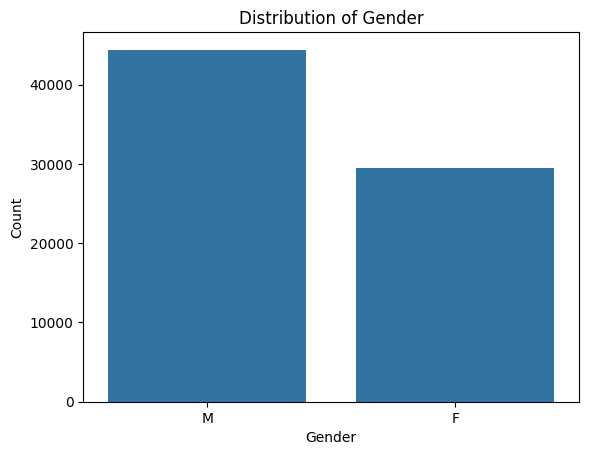

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Frequency count
print(df['Gender'].value_counts())

# Bar plot
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Survival Prediction
1    44373
0    29553
Name: count, dtype: int64


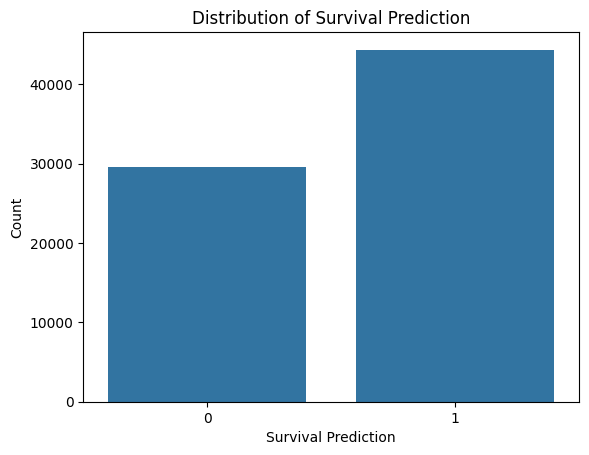

In [ ]:
# Frequency count
print(df_cleaned['Survival Prediction'].value_counts())

# Bar plot
sns.countplot(data=df_cleaned, x='Survival Prediction')
plt.title('Distribution of Survival Prediction')
plt.xlabel('Survival Prediction')
plt.ylabel('Count')
plt.show()


Treatment Type
Surgery         29478
Chemotherapy    22144
Combination     14813
Radiotherapy     7491
Name: count, dtype: int64


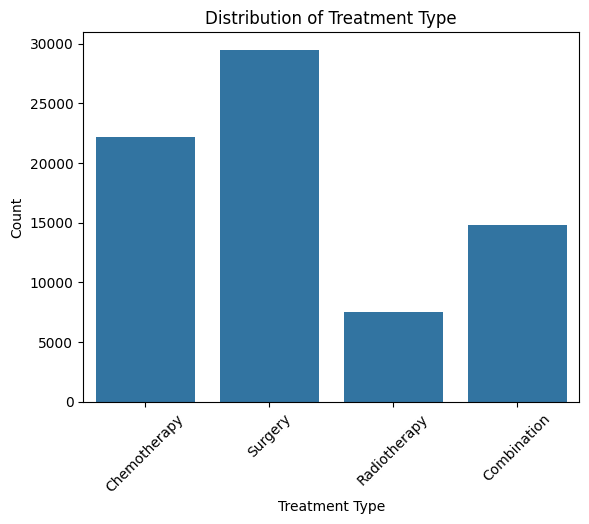

In [ ]:
# Frequency count
print(df_cleaned['Treatment Type'].value_counts())

# Bar plot
sns.countplot(data=df_cleaned, x='Treatment Type')
plt.title('Distribution of Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # In case labels are long
plt.show()


Cancer Stage
Localized     29379
Metastatic    15111
Regional      29436
Name: count, dtype: int64


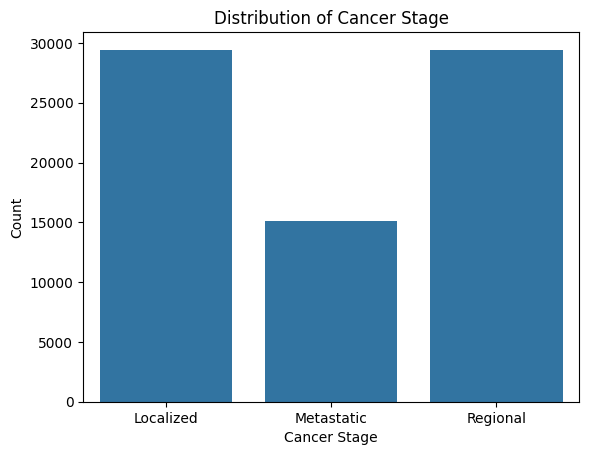

In [ ]:
# Frequency count
print(df['Cancer Stage'].value_counts().sort_index())

# Bar plot
sns.countplot(data=df, x='Cancer Stage', order=sorted(df['Cancer Stage'].unique()))
plt.title('Distribution of Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()


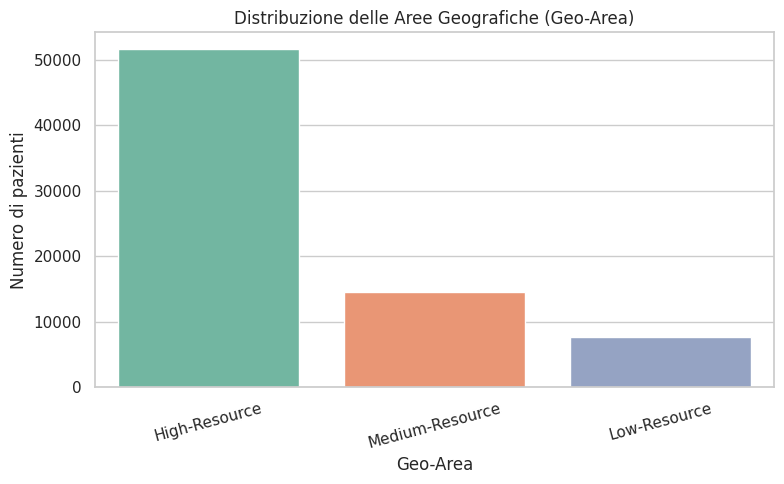

Range Label
0 – 31 mm       26560
31.1 – 62 mm    30580
62.1 – 93 mm    16767
> 124 mm           19
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Imposta lo stile grafico
sns.set(style="whitegrid")

# Crea l'istogramma per Geo-Area
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Geo-Area', palette='Set2')
plt.title('Distribuzione delle Aree Geografiche (Geo-Area)')
plt.xlabel('Geo-Area')
plt.ylabel('Numero di pazienti')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
tumor_size_counts = df_cleaned['Range Label'].value_counts().sort_index()
print(tumor_size_counts)

([0, 1, 2, 3],
 [Text(0, 0, '31.1 – 62 mm'),
  Text(1, 0, '0 – 31 mm'),
  Text(2, 0, '62.1 – 93 mm'),
  Text(3, 0, '> 124 mm')])

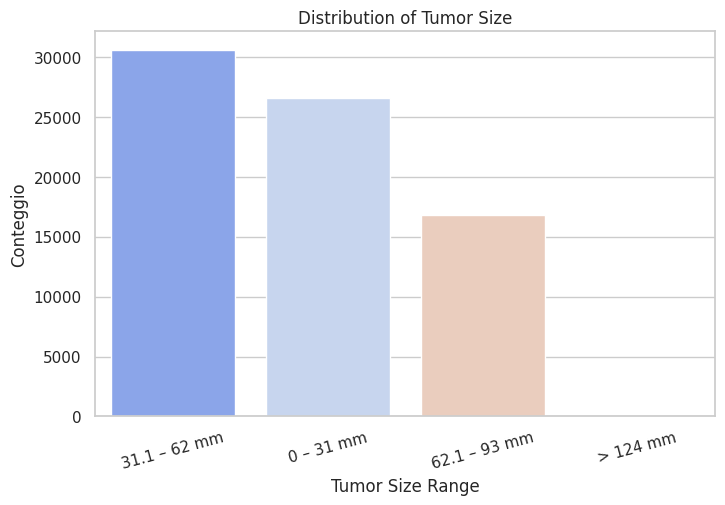

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile
sns.set(style="whitegrid")

# Crea l'istogramma per la colonna 'Tumor Size Range'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Range Label', palette='coolwarm')

# Aggiungi titolo e etichette
plt.title('Distribution of Tumor Size')
plt.xlabel('Tumor Size Range')
plt.ylabel('Conteggio')
plt.xticks(rotation=15)



In [ ]:
df_1

,Alcohol Consumption,Cancer Stage,Country,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,...,Screening History,Smoking History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction,Age,Geo-Area,Tumor Size Range,Range Label
0,0,Localized,UK,0,0,1,0,0,1,0,...,2,0,Chemotherapy,33.0,1,1,59,High-Resource,2,31.1 – 62 mm
1,0,Regional,Japan,0,0,2,0,0,1,0,...,1,1,Chemotherapy,17.0,1,0,67,High-Resource,1,0 – 31 mm
2,0,Localized,France,0,0,2,1,0,1,0,...,0,1,Surgery,34.0,1,1,66,High-Resource,2,31.1 – 62 mm
3,1,Localized,Japan,1,0,1,0,0,1,0,...,2,0,Radiotherapy,71.0,1,0,69,High-Resource,3,62.1 – 93 mm
4,0,Regional,USA,0,0,1,1,1,1,0,...,2,0,Radiotherapy,48.0,0,1,50,High-Resource,2,31.1 – 62 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75029,0,Localized,South Korea,0,0,1,1,0,1,1,...,1,0,Combination,37.0,1,0,54,High-Resource,2,31.1 – 62 mm
75030,1,Localized,Italy,0,0,0,0,0,1,0,...,2,0,Chemotherapy,42.0,1,0,53,High-Resource,2,31.1 – 62 mm
75031,1,Localized,USA,0,0,2,1,0,1,0,...,2,0,Chemotherapy,38.0,1,0,71,High-Resource,2,31.1 – 62 mm
75033,0,Localized,South Africa,0,0,0,1,0,0,0,...,0,0,Surgery,50.0,0,1,74,Medium-Resource,2,31.1 – 62 mm


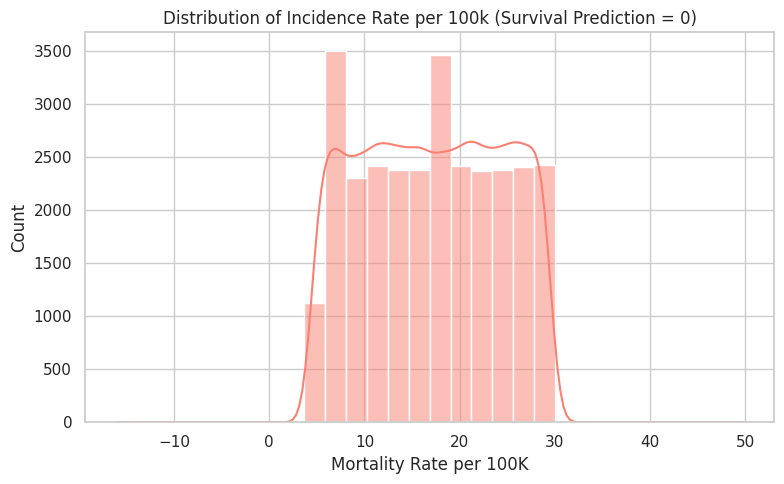

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
filtered_df = df_cleaned[df_cleaned['Survival Prediction'] == 0]

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(
    data=filtered_df,
    x='Mortality Rate per 100K',
    bins=30,
    kde=True,
    color='salmon'
)

plt.title('Distribution of Incidence Rate per 100k (Survival Prediction = 0)')
plt.xlabel('Mortality Rate per 100K')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## 2.2 Bivariate Analysis



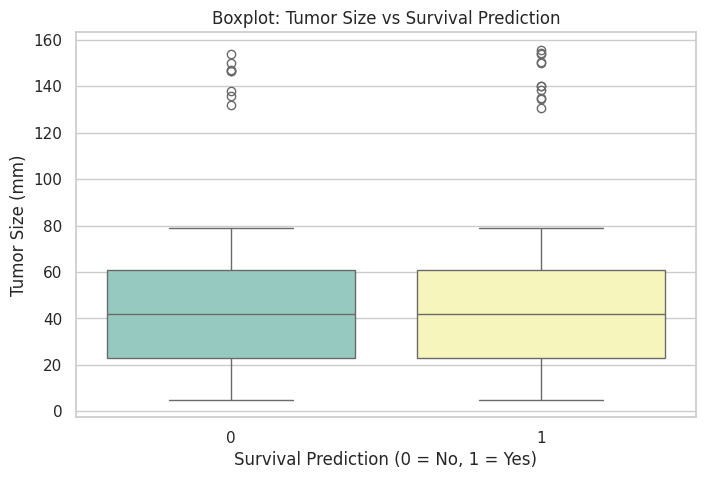

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x='Survival Prediction', y='Tumor Size (mm)', palette='Set3')
plt.title('Boxplot: Tumor Size vs Survival Prediction')
plt.xlabel('Survival Prediction (0 = No, 1 = Yes)')
plt.ylabel('Tumor Size (mm)')
plt.show()


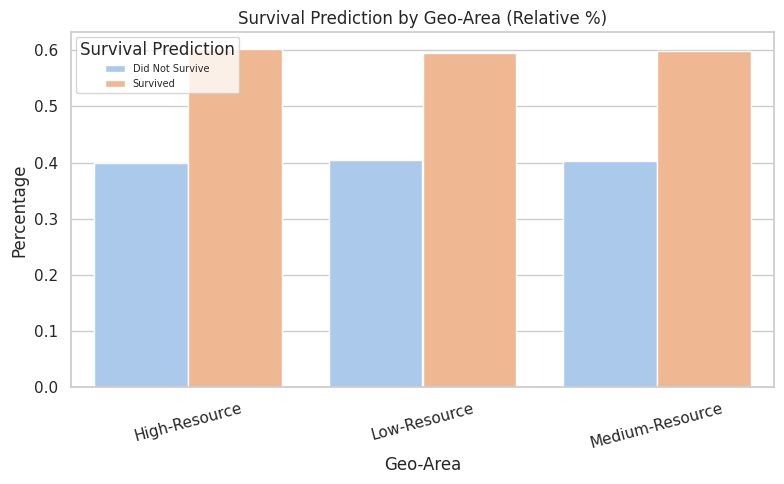

          Geo-Area  Did Not Survive (%)  Survived (%)
0    High-Resource                39.83         60.17
1     Low-Resource                40.52         59.48
2  Medium-Resource                40.20         59.80


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

geo_survival_pct = (
    df_cleaned
    .groupby(['Geo-Area', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=geo_survival_pct,
    x='Geo-Area',
    y='Percentage',
    hue='Survival Prediction',
    palette='pastel'
)

plt.title('Survival Prediction by Geo-Area (Relative %)')
plt.ylabel('Percentage')
plt.xlabel('Geo-Area')
plt.xticks(rotation=15)

# Gestione della legenda
handles, labels = barplot.get_legend_handles_labels()
new_labels = ['Did Not Survive', 'Survived']  # o '0', '1' se preferisci
barplot.legend_.remove()
plt.legend(
    handles,
    new_labels,
    title='Survival Prediction',
    loc='upper left',
    bbox_to_anchor=(0, 1),
    prop={'size': 7}  # circa il 50% della dimensione di default (~12)
)

plt.tight_layout()
plt.show()

# Tabella pivot delle percentuali
survival_table = geo_survival_pct.pivot_table(
    index='Geo-Area',
    columns='Survival Prediction',
    values='Percentage'
).reset_index()

# Rinomina le colonne per chiarezza
survival_table.columns.name = None  # rimuove il nome della colonna multi-index
survival_table = survival_table.rename(columns={0: 'Did Not Survive (%)', 1: 'Survived (%)'})

# Moltiplica per 100 per avere % vere
survival_table[['Did Not Survive (%)', 'Survived (%)']] *= 100

# Opzionale: arrotonda i valori
survival_table = survival_table.round(2)

# Mostra la tabella
print(survival_table)



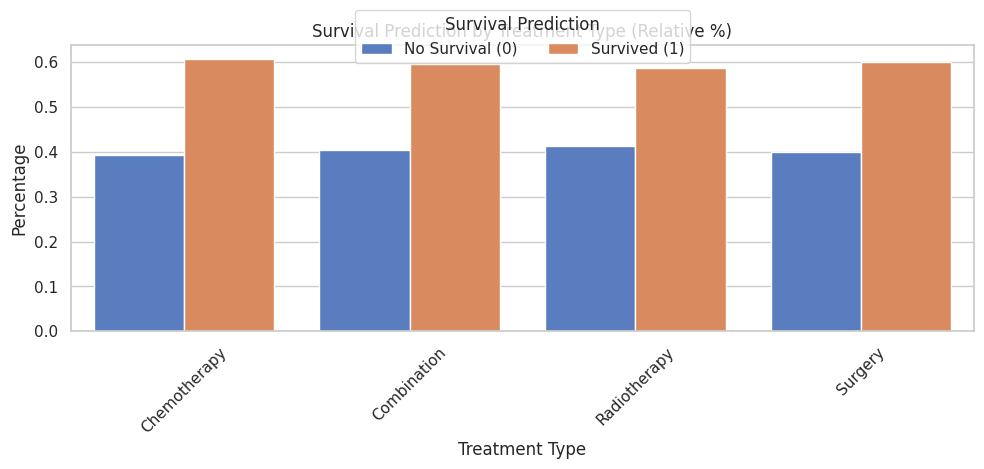

  Treatment Type  Did Not Survive (0) %  Survived (1) %
0   Chemotherapy                  39.27           60.73
1    Combination                  40.48           59.52
2   Radiotherapy                  41.36           58.64
3        Surgery                  39.90           60.10


In [ ]:
#Treatment Percentage

treatment_pct = (
    df_cleaned
    .groupby(['Treatment Type', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=treatment_pct,
    x='Treatment Type',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Treatment Type (Relative %)')
plt.xlabel('Treatment Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Legenda chiara e centrata in alto
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

# Pivot for cleaner table display
treatment_table = treatment_pct.pivot(index='Treatment Type', columns='Survival Prediction', values='Percentage')

# Rename columns for clarity
treatment_table.columns = ['Did Not Survive (0) %', 'Survived (1) %']

# Convert to percentage format
treatment_table = (treatment_table * 100).round(2)

print(treatment_table.reset_index())


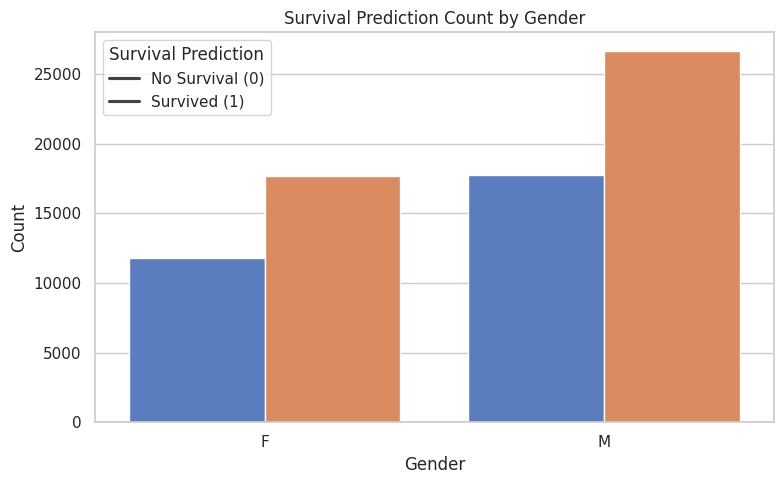

In [ ]:
# Count of Survival Prediction grouped by Gender
gender_counts = (
    df.groupby(['Gender', 'Survival Prediction'])
    .size()
    .reset_index(name='Count')
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=gender_counts,
    x='Gender',
    y='Count',
    hue='Survival Prediction',
    palette='muted'
)

plt.title('Survival Prediction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Legend
plt.legend(
    title='Survival Prediction',
    labels=['No Survival (0)', 'Survived (1)']
)

plt.tight_layout()
plt.show()


There are no significaltly differences in terms of  outliers for Tumor Size through the two classes (Survival Prediction)

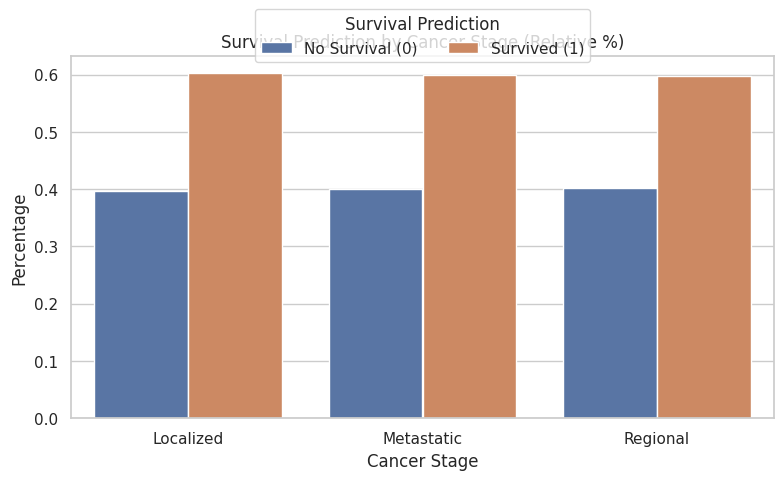

Cancer Stage  Survival Prediction  Percentage
   Localized                    0    0.397665
   Localized                    1    0.602335
  Metastatic                    0    0.400503
  Metastatic                    1    0.599497
    Regional                    0    0.401481
    Regional                    1    0.598519


In [ ]:

# Calculate Cancer Stage proportions
cancer_pct = (
    df_cleaned
    .groupby(['Cancer Stage', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cancer_pct,
    x='Cancer Stage',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='deep'
)

plt.title('Survival Prediction by Cancer Stage (Relative %)')
plt.xlabel('Cancer Stage')
plt.ylabel('Percentage')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

# Display the table of percentages
print(cancer_pct.to_string(index=False))


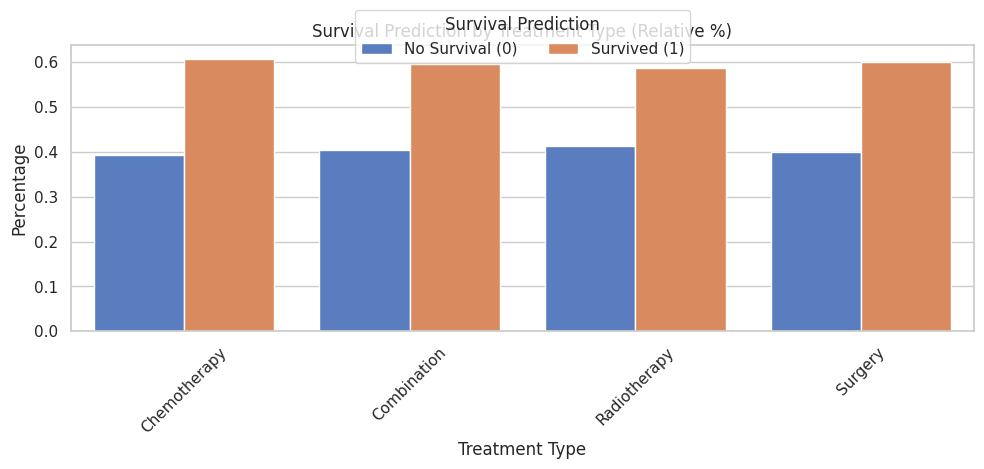

Treatment Type  Survival Prediction  Percentage
  Chemotherapy                    0    0.392702
  Chemotherapy                    1    0.607298
   Combination                    0    0.404780
   Combination                    1    0.595220
  Radiotherapy                    0    0.413563
  Radiotherapy                    1    0.586437
       Surgery                    0    0.399043
       Surgery                    1    0.600957


In [ ]:

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=treatment_pct,
    x='Treatment Type',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Treatment Type (Relative %)')
plt.xlabel('Treatment Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

# Mostra tabella dati
print(treatment_pct.to_string(index=False))


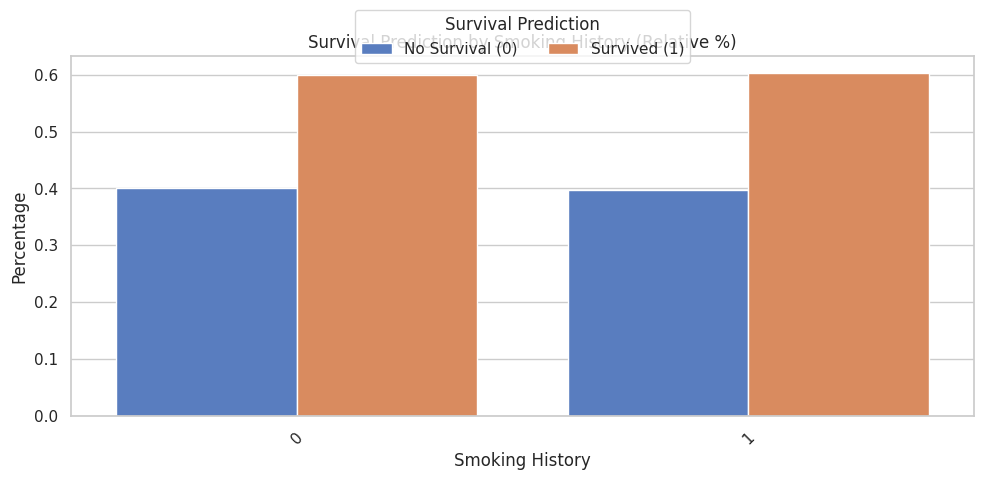

 Smoking History  Survival Prediction  Percentage
               0                    0    0.401357
               0                    1    0.598643
               1                    0    0.397396
               1                    1    0.602604


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate relative percentages for each 'Smoker History'
smoker_pct = (
    df_cleaned
    .groupby(['Smoking History', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=smoker_pct,
    x='Smoking History',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Smoking History (Relative %)')
plt.xlabel('Smoking History')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

# Display table data
print(smoker_pct.to_string(index=False))


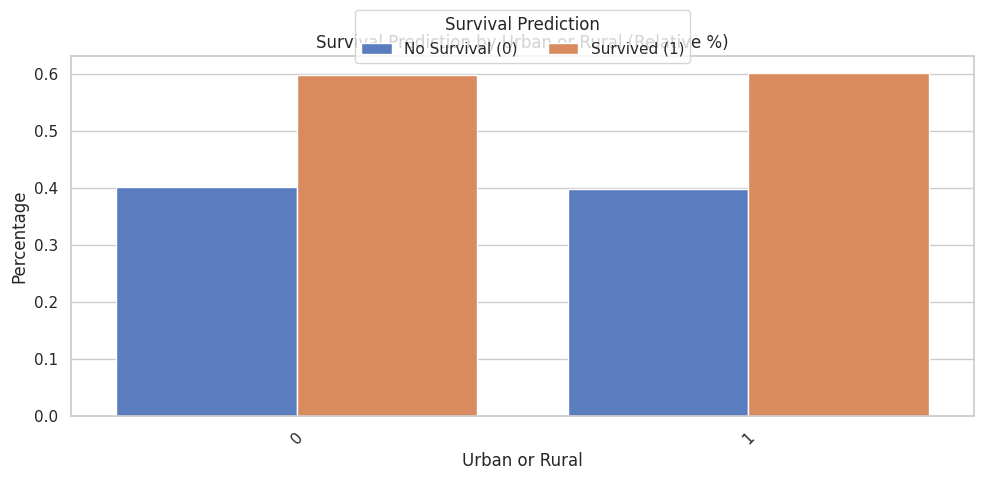

 Urban or Rural  Survival Prediction  Percentage
              0                    0    0.402331
              0                    1    0.597669
              1                    0    0.398668
              1                    1    0.601332


In [ ]:

# Calculate relative percentages for each 'Urban/Rural'

urban_rural_pct = (
    df_cleaned
    .groupby(['Urban or Rural', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)



# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=urban_rural_pct,
    x='Urban or Rural',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Urban or Rural (Relative %)')
plt.xlabel('Urban or Rural')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

print(urban_rural_pct.to_string(index=False))


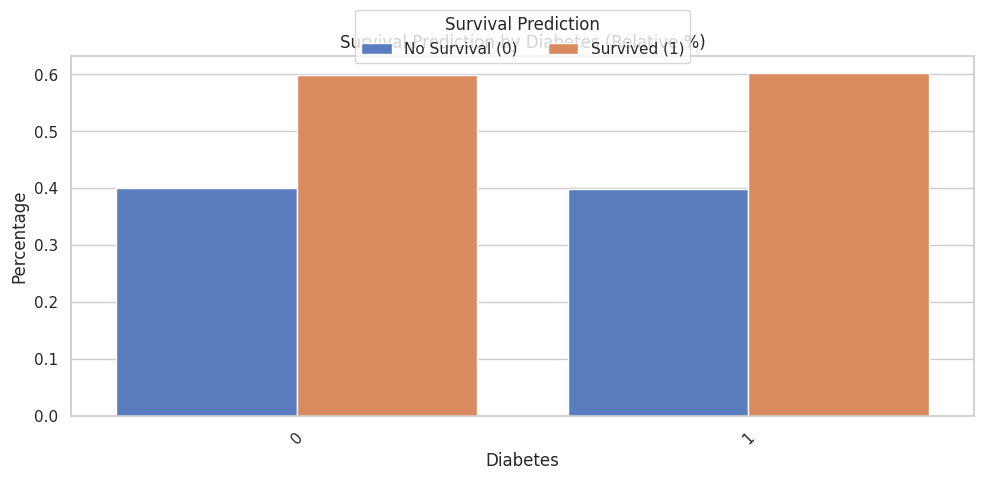

 Diabetes  Survival Prediction  Percentage
        0                    0    0.400226
        0                    1    0.599774
        1                    0    0.397908
        1                    1    0.602092


,Alcohol Consumption,Cancer Stage,Country,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,Gender,Genetic Mutation,...,Screening History,Smoking History,Treatment Type,Tumor Size (mm),Urban or Rural,Survival Prediction,Age,Geo-Area,Tumor Size Range,Range Label
0,0,Localized,UK,0,0,1,0,0,1,0,...,2,0,Chemotherapy,33.0,1,1,59,High-Resource,2,31.1 – 62 mm
1,0,Regional,Japan,0,0,2,0,0,1,0,...,1,1,Chemotherapy,17.0,1,0,67,High-Resource,1,0 – 31 mm
2,0,Localized,France,0,0,2,1,0,1,0,...,0,1,Surgery,34.0,1,1,66,High-Resource,2,31.1 – 62 mm
3,1,Localized,Japan,1,0,1,0,0,1,0,...,2,0,Radiotherapy,71.0,1,0,69,High-Resource,3,62.1 – 93 mm
4,0,Regional,USA,0,0,1,1,1,1,0,...,2,0,Radiotherapy,48.0,0,1,50,High-Resource,2,31.1 – 62 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75029,0,Localized,South Korea,0,0,1,1,0,1,1,...,1,0,Combination,37.0,1,0,54,High-Resource,2,31.1 – 62 mm
75030,1,Localized,Italy,0,0,0,0,0,1,0,...,2,0,Chemotherapy,42.0,1,0,53,High-Resource,2,31.1 – 62 mm
75031,1,Localized,USA,0,0,2,1,0,1,0,...,2,0,Chemotherapy,38.0,1,0,71,High-Resource,2,31.1 – 62 mm
75033,0,Localized,South Africa,0,0,0,1,0,0,0,...,0,0,Surgery,50.0,0,1,74,Medium-Resource,2,31.1 – 62 mm


In [ ]:
# Calculate relative percentages for 'Diabetes'
diabetes_pct = (
    df_cleaned
    .groupby(['Diabetes', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=diabetes_pct,
    x='Diabetes',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Diabetes (Relative %)')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

print(diabetes_pct.to_string(index=False))

df_cleaned


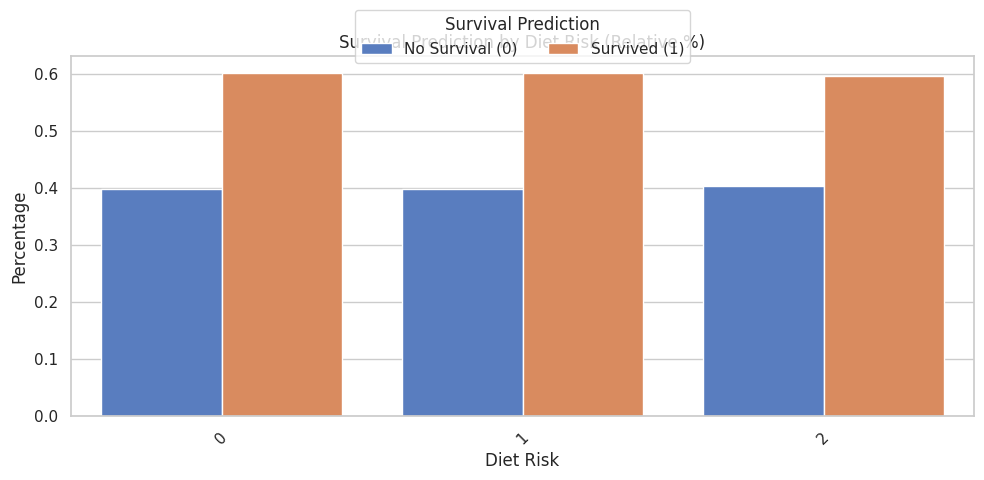

 Diet Risk  Survival Prediction  Percentage
         0                    0    0.398568
         0                    1    0.601432
         1                    0    0.398755
         1                    1    0.601245
         2                    0    0.404149
         2                    1    0.595851


In [ ]:
# Calculate relative percentages for 'Diet Risk'
diet_risk_pct = (
    df_cleaned
    .groupby(['Diet Risk', 'Survival Prediction'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='Percentage')
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=diet_risk_pct,
    x='Diet Risk',
    y='Percentage',
    hue='Survival Prediction',
    hue_order=[0, 1],
    palette='muted'
)

plt.title('Survival Prediction by Diet Risk (Relative %)')
plt.xlabel('Diet Risk')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['No Survival (0)', 'Survived (1)'],
    title='Survival Prediction',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

plt.tight_layout()
plt.show()

print(diet_risk_pct.to_string(index=False))


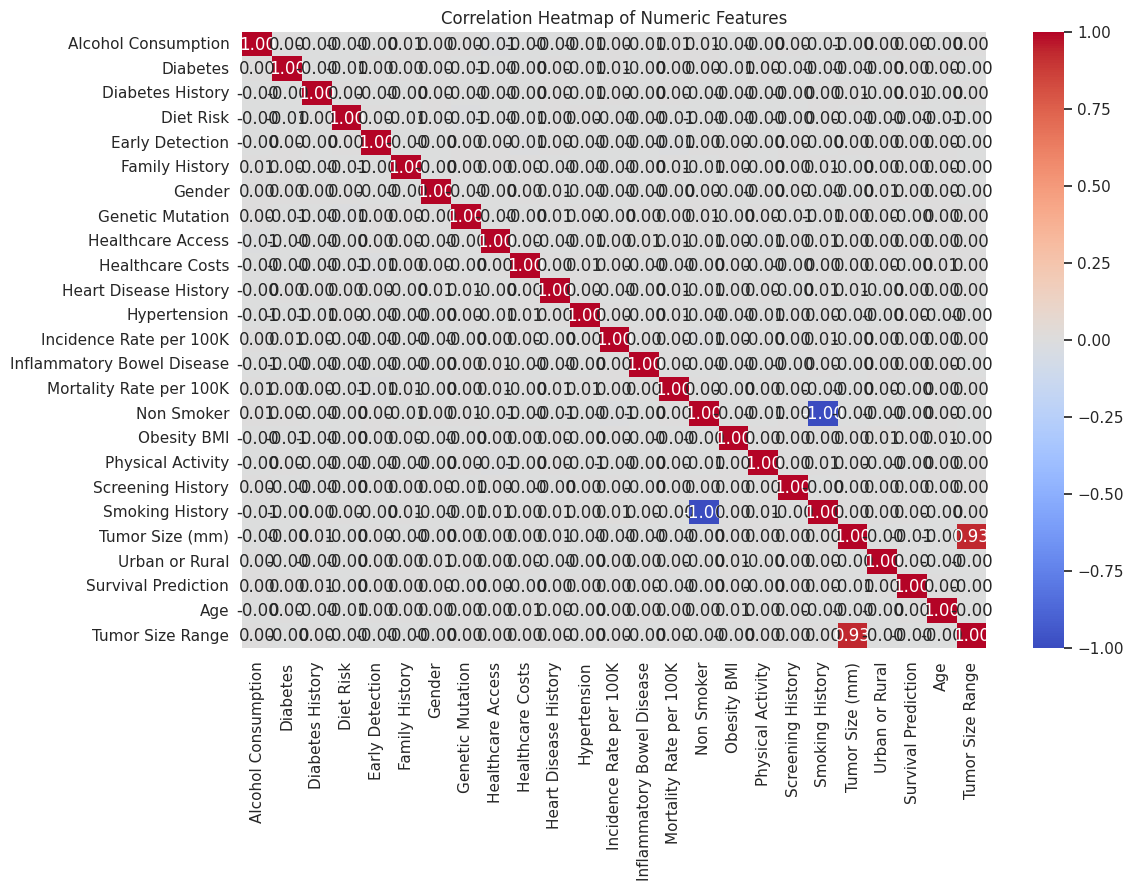

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features only
numeric_df = df_1.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()



## 2.3 Outlier Detection



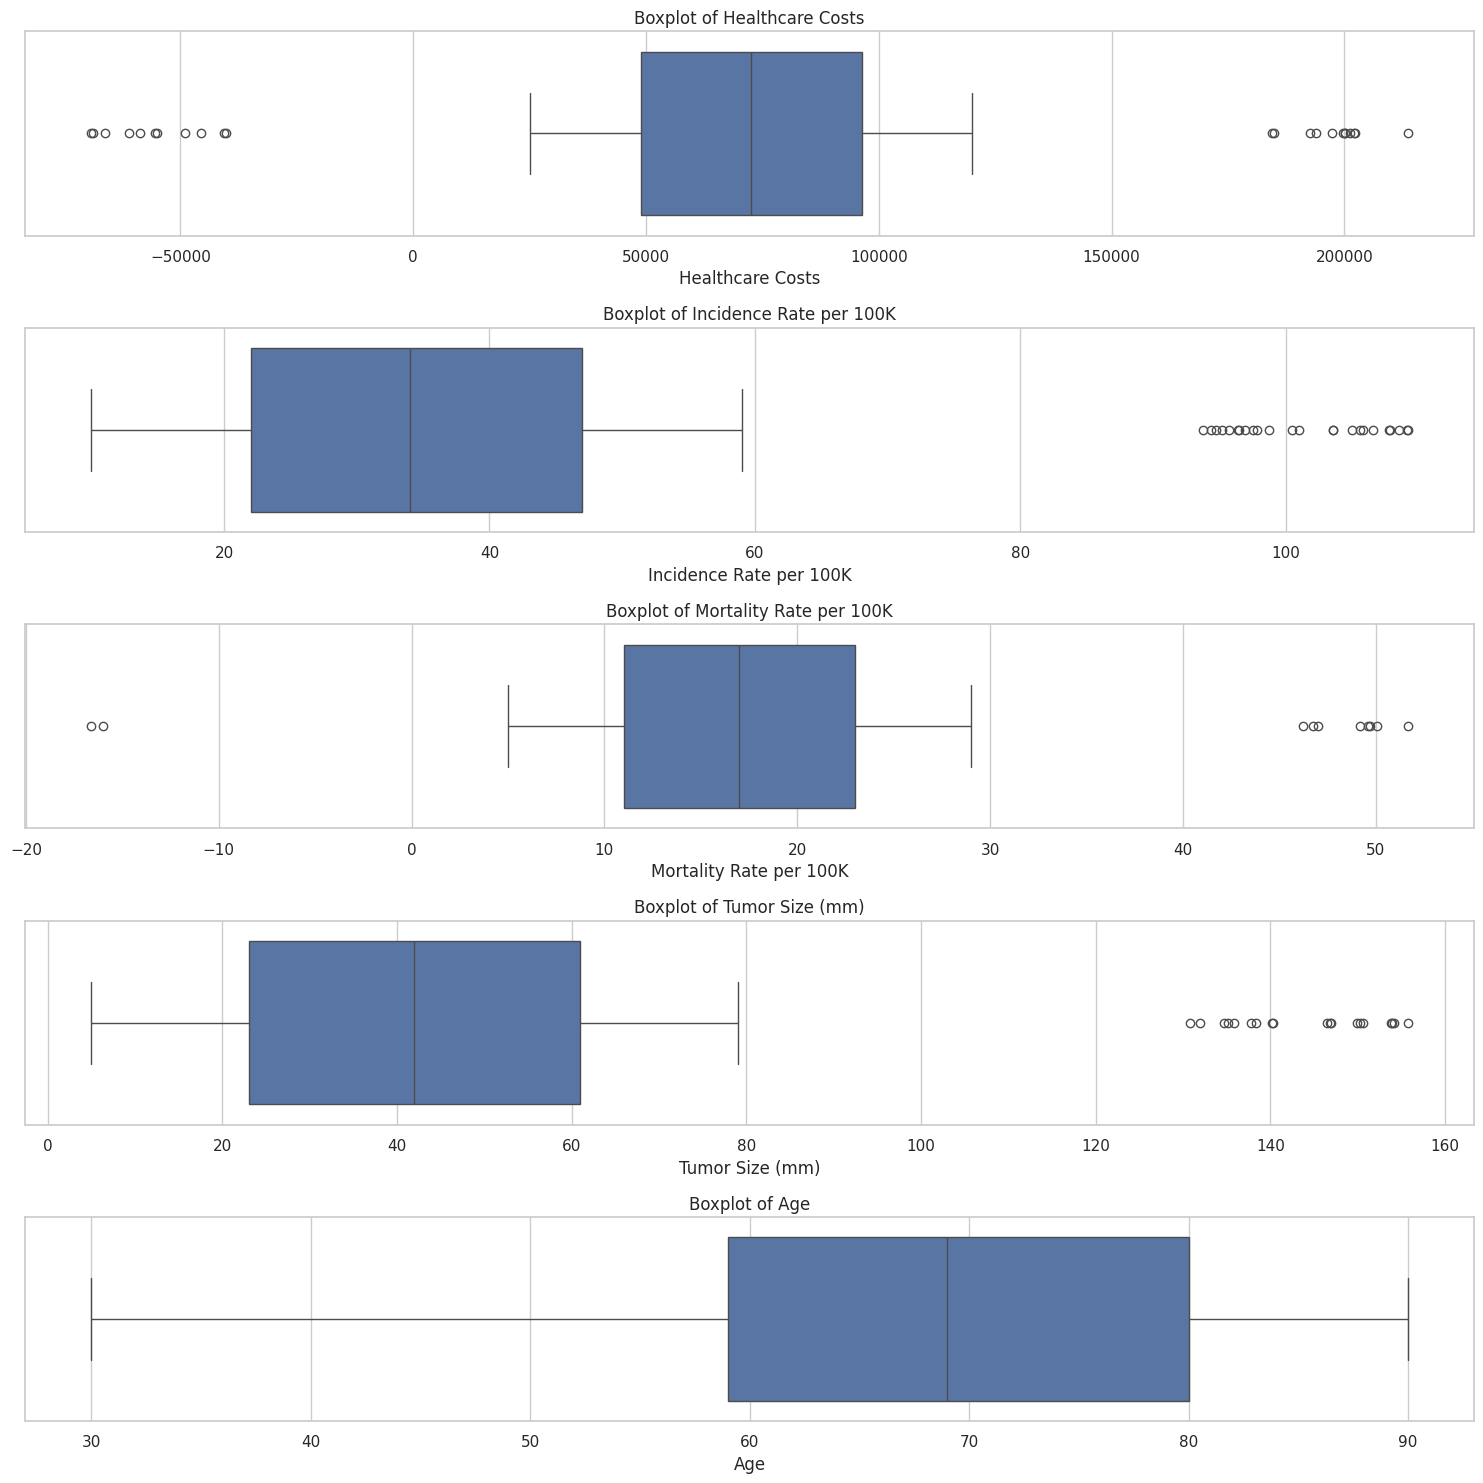

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, len(numeric_df.columns)*3))

for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(len(numeric_df.columns), 1, i)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:

import numpy as np

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier mask (True for outliers)
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Filter out rows that have any outliers
df_cleaned = numeric_df[~outliers_iqr.any(axis=1)]

print("Original shape:", numeric_df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (73926, 5)
Cleaned shape: (73850, 5)


## 2.6 Key Insights


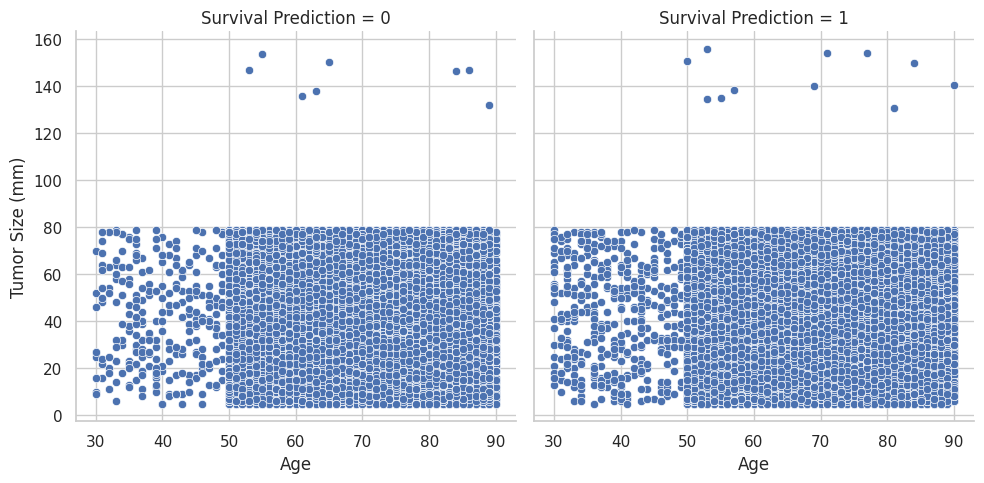

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_1, col='Survival Prediction', height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='Age', y='Tumor Size (mm)')
g.set_axis_labels('Age', 'Tumor Size (mm)')
g.set_titles(col_template='Survival Prediction = {col_name}')
plt.show()



This show us that most of the patiens (for both the Prediction Classes) are mostly over 50 and there's like a capping on Tumor Size >= 80, with a big empty data gap between > 80 and < 140.

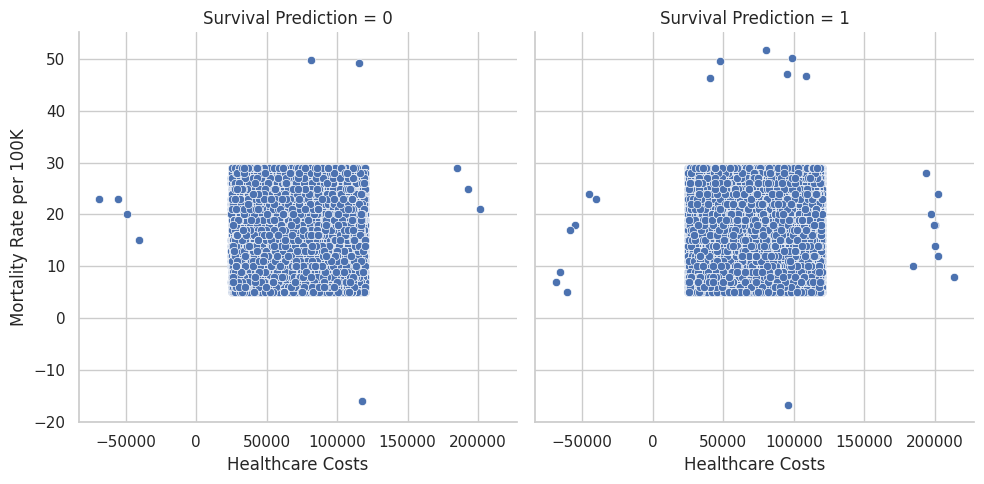

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for 'Survival Prediction'
g = sns.FacetGrid(df_1, col='Survival Prediction', height=5, aspect=1)

# Plot scatterplot of Mortality Rate vs Healthcare Costs
g.map_dataframe(sns.scatterplot, x='Healthcare Costs', y='Mortality Rate per 100K')

# Set axis labels and titles
g.set_axis_labels('Healthcare Costs', 'Mortality Rate per 100K')
g.set_titles(col_template='Survival Prediction = {col_name}')

# Display the plot
plt.tight_layout()
plt.show()


# 3. Feature Selection

## 3.1 Categorical Variables

### 3.1.1 Chi-square

in this part we are gonna to define some functions useful for feature selection

In [ ]:
def apply_chisquare(X_col, y, varname):
    try:
        # Create contingency table
        contingency_table = pd.crosstab(X_col, y)

        # Check for valid table
        if contingency_table.empty or contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            return None  # Not valid

        # Chi-square test
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        if p < 0.05:
            print(f"{varname}: IMPORTANT predictor (p = {p:.4f}) — keep in model.\n")
            return varname
        else:
            print(f"{varname}: NOT an important predictor (p = {p:.4f}) — discard.\n")
            return None

    except Exception as e:
        print(f"{varname}: Error during chi-square test — {e}")
        return None

In [ ]:
# Main function
def select_best_cat_features(X, y):
    count = 1

    # Ensure consistent categorical selection
    cat_vars = df.columns.tolist()
    cat_vars = X.select_dtypes(include=['object', 'category', 'bool']).columns

    cat_vars = [var for var in cat_vars if var in X.columns]

    if not cat_vars:
        print("No categorical variables found in X.")
        return

    # Define StratifiedKFold with 5 splits (you can change this)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################
        print('_________________________________________________________________________________________________\n')
        print(f'                                     SPLIT {count}                                     \n')

        X_train_cat = X_train[cat_vars].copy()

        for var in X_train_cat:
            apply_chisquare(X_train_cat[var], y_train, var)

        count += 1

In [ ]:
 X_sel = df_1.drop('Survival Prediction', axis = 1)
y_sel = df_1['Survival Prediction'].copy()



In [ ]:
select_best_cat_features(X_sel, y_sel)

_________________________________________________________________________________________________

                                     SPLIT 1                                     

Cancer Stage: NOT an important predictor (p = 0.5810) — discard.

Country: NOT an important predictor (p = 0.3166) — discard.

Insurance Costs: NOT an important predictor (p = 0.8889) — discard.

Insurance Status: NOT an important predictor (p = 0.5112) — discard.

Treatment Type: IMPORTANT predictor (p = 0.0089) — keep in model.

Geo-Area: NOT an important predictor (p = 0.4735) — discard.

Range Label: NOT an important predictor (p = 0.7329) — discard.

_________________________________________________________________________________________________

                                     SPLIT 2                                     

Cancer Stage: NOT an important predictor (p = 0.7142) — discard.

Country: NOT an important predictor (p = 0.0950) — discard.

Insurance Costs: NOT an important predictor (p = 

## 3.2 Numerical Variables

## 3.2.1 Variance

In [ ]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

In [ ]:
def select_features_variance(X, y):
    count = 1
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH VARIANCE ########################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using variance
        for var in numerical_columns:
          apply_variance(X_train[var], var)

        count+=1

In [ ]:
select_features_variance(X_sel, y_sel)

_________________________________________________________________________________________________

                                     SPLIT 1                                    

Alcohol Consumption:0.25000153710668327
Diabetes:0.1591688446487154
Diabetes History:0.00013525622384757873
Diet Risk:0.4881634875521155
Early Detection:0.240266104017045
Family History:0.20999678694429844
Gender:0.2396595733949961
Genetic Mutation:0.1263037506718659
Healthcare Access:0.4926885781660077
Healthcare Costs:757678168.6975279
Heart Disease History:0.09117624605692833
Hypertension:0.16076201638009846
Incidence Rate per 100K:210.20251081218984
Inflammatory Bowel Disease:0.09047463241590913
Mortality Rate per 100K:52.034309164144396
Non Smoker:0.2403726035398257
Obesity BMI:0.6000672426915156
Physical Activity:0.6021815541463473
Screening History:0.5581485821938692
Smoking History:0.2403726035398257
Tumor Size (mm):472.5011279838769
Urban or Rural:0.21040834521195884
Age:140.71053072756897
Tumor Siz

we can drop Marital Status as its  NaN column

## 3.2.2 Spearman Correlation

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
def apply_correlation(X_train):
    X_train = X_train.drop(columns=['ID'], errors='ignore')

    correlation_data = X_train.copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

In [ ]:
def redundant_features(X, y):
    count = 1
    X_train = X.drop(columns=['ID'], errors='ignore')

    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count+=1

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

redundant_features(X_sel, y_sel)

## 3.2.3 Feature Importance in Decision Trees

In [ ]:
def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

In [ ]:
def select_best_features_dt(X, y, skf):
    count = 1

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        # Select only numeric features
        X_train_numeric = X_train.select_dtypes(include=['number'])
        X_train_numeric = X_train_numeric.drop(columns=['ID'], errors='ignore')
        X_val_numeric = X_val.select_dtypes(include=['number'])

        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    \n')

        # Call your decision tree feature selector on numeric features only
        apply_dt(X_train_numeric, y_train)

        count += 1


_________________________________________________________________________________________________

                                     SPLIT 1                                    



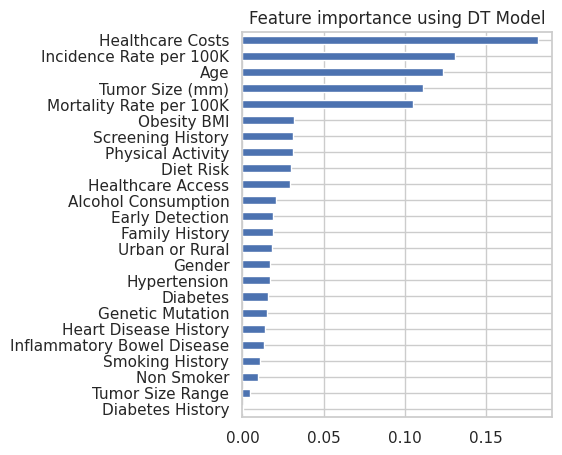

_________________________________________________________________________________________________

                                     SPLIT 2                                    



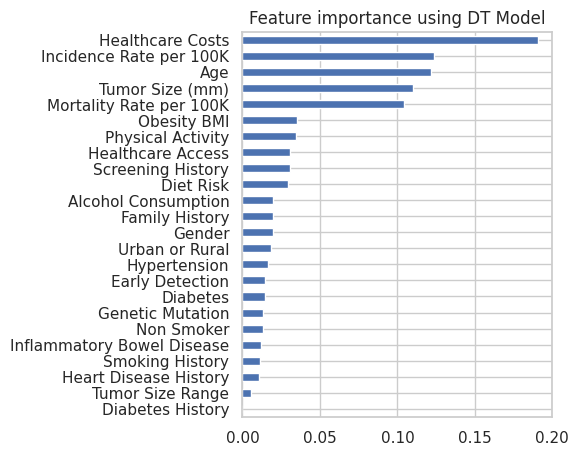

_________________________________________________________________________________________________

                                     SPLIT 3                                    



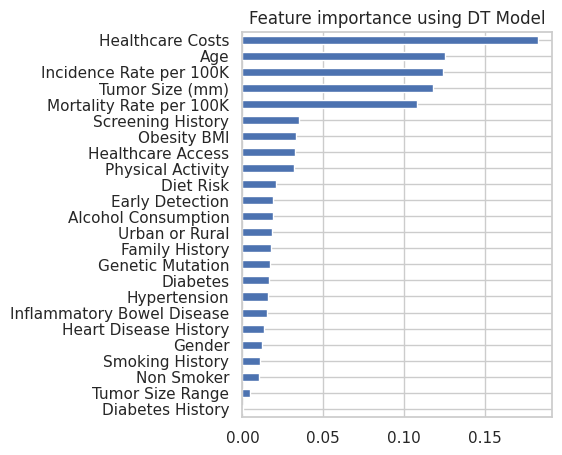

_________________________________________________________________________________________________

                                     SPLIT 4                                    



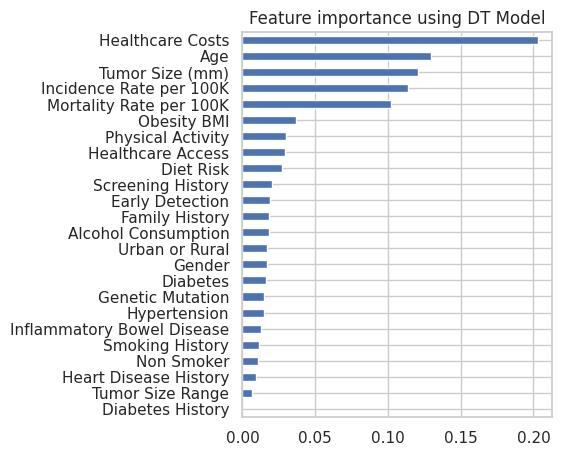

_________________________________________________________________________________________________

                                     SPLIT 5                                    



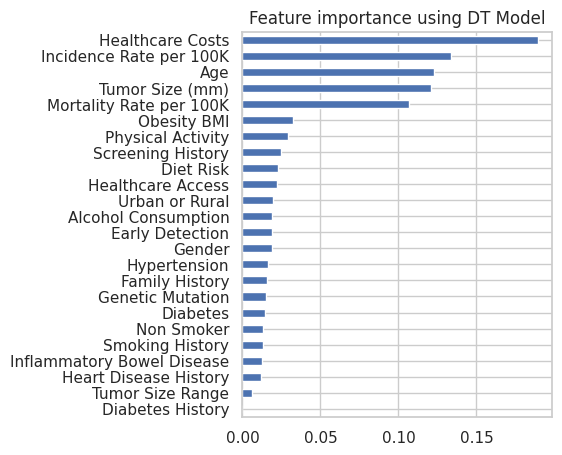

In [ ]:
select_best_features_dt(X_sel, y_sel,skf)

 Modello Training w/ KNN

## 3.2.4 Recursive Feature Elimination with Logistic Regression

Create and RFE istance with n_features_to_select = 5

In [ ]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

## 3.2.5 Lasso Regression

In [ ]:
def apply_lasso(X_train, y_train):

    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

## 3.2.6 Select Best Features

In [ ]:
 def select_best_features(X, y):
    count = 1

    for train_index, val_index in skf.split(X, y):
        methods = ['Chi-Square', 'RFE', 'Lasso', 'DT']
        features = X.select_dtypes(include=['number']).columns
        results = {feature: {m: 0 for m in methods} for feature in features}

        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Ensure X_train is numeric before scaling
        X_train_numeric = X_train.select_dtypes(include=['number'])

        # Scale Data
        scaler = MinMaxScaler().fit(X_train_numeric)
        X_train_scaled = scaler.transform(X_train_numeric)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)

        print('_________________________________________________________________________________________________\n')
        print(f'                                     SPLIT {count}                                    \n')

        # RFE
        print('\n------------------ RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)

        # LASSO
        print('\n------------------ LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)

        # Decision Tree
        print('\n------------------ DT -----------------------')
        apply_dt(X_train_scaled, y_train)
        count = count+1





_________________________________________________________________________________________________

                                     SPLIT 1                                    


------------------ RFE ----------------------
Alcohol Consumption           False
Diabetes                      False
Diabetes History               True
Diet Risk                     False
Early Detection               False
Family History                False
Gender                        False
Genetic Mutation              False
Healthcare Access             False
Healthcare Costs               True
Heart Disease History         False
Hypertension                  False
Incidence Rate per 100K       False
Inflammatory Bowel Disease    False
Mortality Rate per 100K       False
Non Smoker                     True
Obesity BMI                   False
Physical Activity             False
Screening History             False
Smoking History                True
Tumor Size (mm)                True
Urban or Rural  

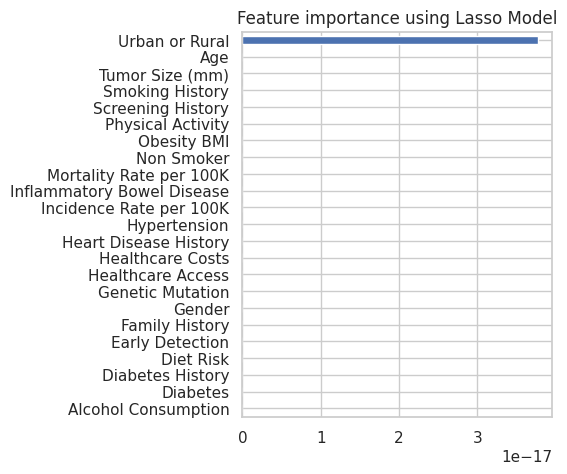


------------------ DT -----------------------


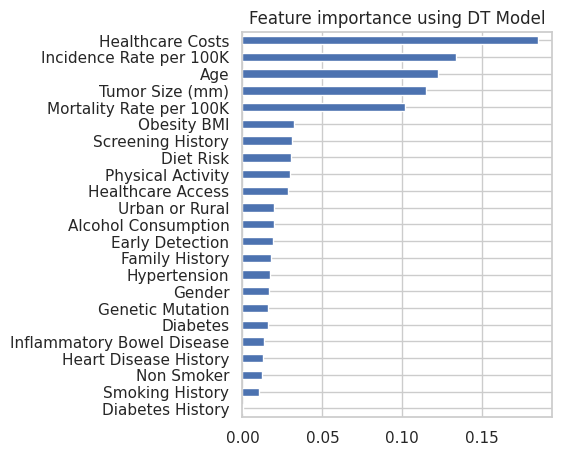

_________________________________________________________________________________________________

                                     SPLIT 2                                    


------------------ RFE ----------------------
Alcohol Consumption           False
Diabetes                      False
Diabetes History               True
Diet Risk                     False
Early Detection               False
Family History                False
Gender                        False
Genetic Mutation              False
Healthcare Access             False
Healthcare Costs              False
Heart Disease History         False
Hypertension                  False
Incidence Rate per 100K       False
Inflammatory Bowel Disease    False
Mortality Rate per 100K        True
Non Smoker                     True
Obesity BMI                   False
Physical Activity             False
Screening History             False
Smoking History                True
Tumor Size (mm)                True
Urban or Rural  

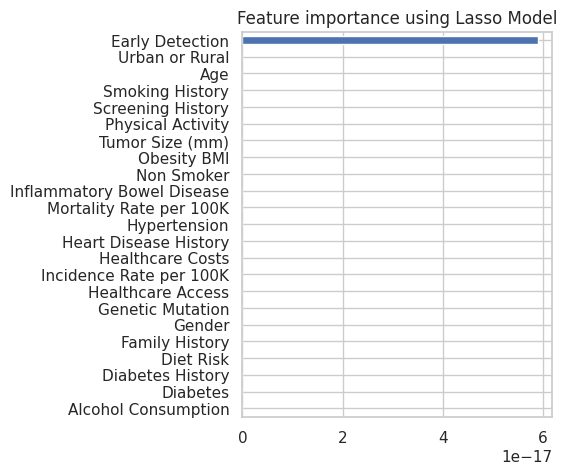


------------------ DT -----------------------


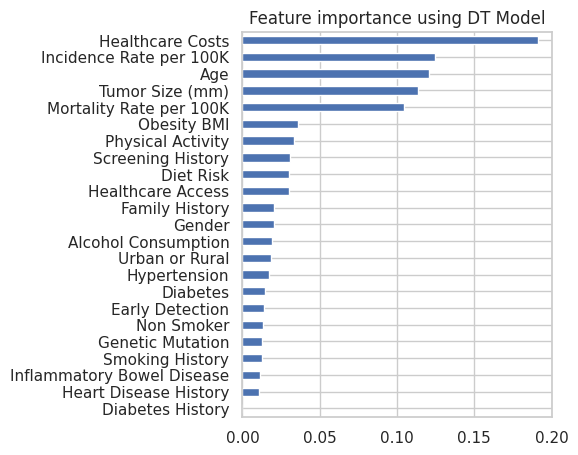

_________________________________________________________________________________________________

                                     SPLIT 3                                    


------------------ RFE ----------------------
Alcohol Consumption           False
Diabetes                      False
Diabetes History              False
Diet Risk                      True
Early Detection               False
Family History                False
Gender                        False
Genetic Mutation              False
Healthcare Access             False
Healthcare Costs               True
Heart Disease History         False
Hypertension                  False
Incidence Rate per 100K       False
Inflammatory Bowel Disease    False
Mortality Rate per 100K       False
Non Smoker                     True
Obesity BMI                   False
Physical Activity             False
Screening History             False
Smoking History                True
Tumor Size (mm)                True
Urban or Rural  

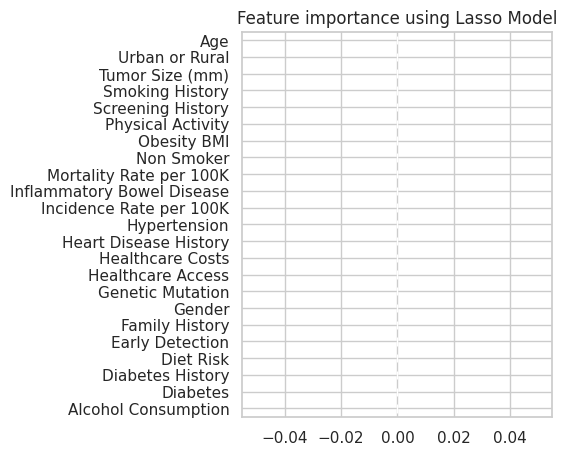


------------------ DT -----------------------


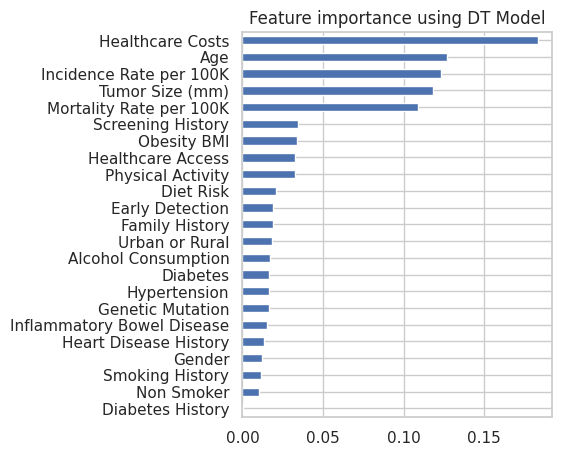

_________________________________________________________________________________________________

                                     SPLIT 4                                    


------------------ RFE ----------------------
Alcohol Consumption           False
Diabetes                      False
Diabetes History              False
Diet Risk                     False
Early Detection               False
Family History                False
Gender                        False
Genetic Mutation              False
Healthcare Access             False
Healthcare Costs               True
Heart Disease History         False
Hypertension                  False
Incidence Rate per 100K       False
Inflammatory Bowel Disease    False
Mortality Rate per 100K        True
Non Smoker                     True
Obesity BMI                   False
Physical Activity             False
Screening History             False
Smoking History                True
Tumor Size (mm)                True
Urban or Rural  

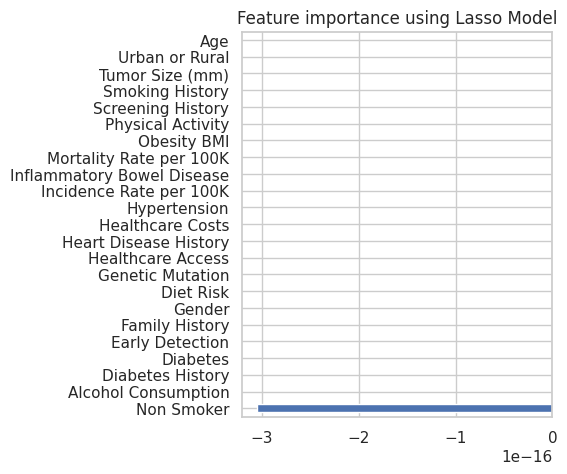


------------------ DT -----------------------


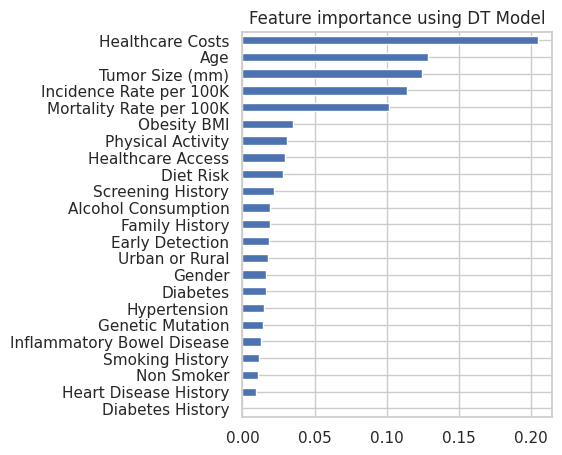

_________________________________________________________________________________________________

                                     SPLIT 5                                    


------------------ RFE ----------------------
Alcohol Consumption           False
Diabetes                      False
Diabetes History              False
Diet Risk                     False
Early Detection               False
Family History                False
Gender                        False
Genetic Mutation              False
Healthcare Access             False
Healthcare Costs               True
Heart Disease History         False
Hypertension                  False
Incidence Rate per 100K       False
Inflammatory Bowel Disease    False
Mortality Rate per 100K        True
Non Smoker                     True
Obesity BMI                   False
Physical Activity             False
Screening History             False
Smoking History                True
Tumor Size (mm)                True
Urban or Rural  

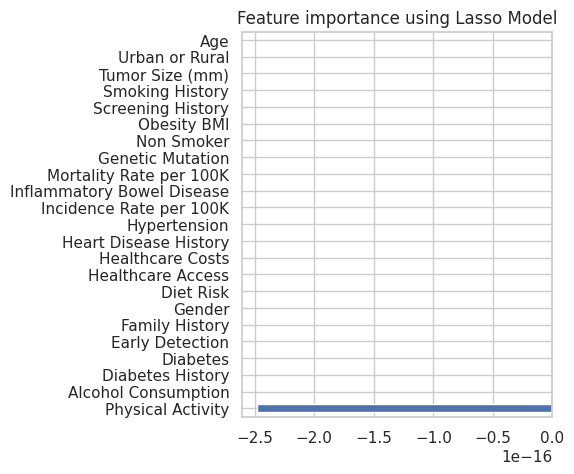


------------------ DT -----------------------


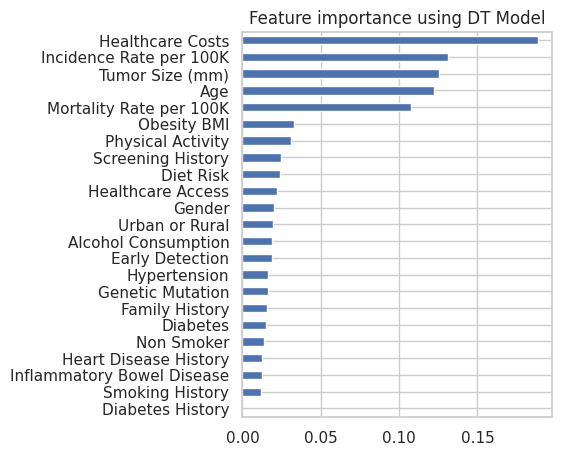

None


In [ ]:
#Define X and Y for Numerical Feature Selection

X_sel = df_numeric.drop(['Survival Prediction','Tumor Size Range'], axis = 1)
y_sel = df_numeric['Survival Prediction'].copy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

summary_table= select_best_features(X_sel, y_sel)
print(summary_table)


In [ ]:
keep_data =df_1[[
    'Treatment Type',
    'Healthcare Costs',
    'Mortality Rate per 100K',
    'Tumor Size (mm)',
    'Survival Prediction'
]].copy()

keep_data.to_csv('keep_data.csv')
all_data = df_1.copy()
all_data.to_csv('all_data.csv')
keep_data

,Treatment Type,Healthcare Costs,Mortality Rate per 100K,Tumor Size (mm),Survival Prediction
0,Chemotherapy,76553.0,25.0,33.0,1
1,Chemotherapy,62805.0,27.0,17.0,0
2,Surgery,66425.0,27.0,34.0,1
3,Radiotherapy,82764.0,19.0,71.0,0
4,Radiotherapy,47269.0,11.0,48.0,1
...,...,...,...,...,...
75029,Combination,92265.0,12.0,37.0,0
75030,Chemotherapy,70574.0,10.0,42.0,0
75031,Chemotherapy,77430.0,29.0,38.0,0
75033,Surgery,108752.0,17.0,50.0,1


# 4. Model Selection and Optimization

## 4.1 Model Selection

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score

# Load CSVs as DataFrames
keep_data = pd.read_csv('keep_data.csv')
all_data = pd.read_csv('all_data.csv')

# Drop missing values from keep_data
keep_data = keep_data.dropna().reset_index(drop=True)  # ✅ call the method properly

# Optional: Confirm they're DataFrames (debugging help)
print("keep_data type:", type(keep_data))
print("all_data type:", type(all_data))


keep_data type: <class 'pandas.core.frame.DataFrame'>
all_data type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
def encode_data(dataset):

    ########################################## CREATE DUMMIES #################################################
    # Create dummies and remove one of the variables (to avoid multicollinearity)
    data_dummies = pd.get_dummies(dataset)


    return data_dummies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix

def select_best_models(data, model):
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    X = data.drop('Survival Prediction', axis=1)
    y = data['Survival Prediction'].copy()

    X = encode_data(X)
    score_train, score_val = [], []
    last_conf_matrix = None

    # Cross-validation loop
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        scaler = MinMaxScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_train_scaled, y_train)

        pred_train = model.predict(X_train_scaled)
        pred_val = model.predict(X_val_scaled)

        score_train.append(f1_score(y_train, pred_train))
        score_val.append(f1_score(y_val, pred_val))

        # Store confusion matrix for the last fold
        last_conf_matrix = confusion_matrix(y_val, pred_val)

    # Plot confusion matrix for the last fold
    plt.figure(figsize=(6, 5))
    sns.heatmap(last_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Last Fold ({model.__class__.__name__})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Return performance metrics
    avg_train = round(np.mean(score_train), 3)
    avg_val = round(np.mean(score_val), 3)
    std_train = round(np.std(score_train), 2)
    std_val = round(np.std(score_val), 2)

    return avg_train, std_train, avg_val, std_val


In [ ]:
def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [ ]:
# DO IT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# DO IT
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)
# DO IT
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN','DT','NN'])
#all_data=pd.DataFrame(all_data)
print(all_data)
keep_data


       Unnamed: 0  Alcohol Consumption Cancer Stage       Country  Diabetes  \
0               0                    0    Localized            UK         0   
1               1                    0     Regional         Japan         0   
2               2                    0    Localized        France         0   
3               3                    1    Localized         Japan         1   
4               4                    0     Regional           USA         0   
...           ...                  ...          ...           ...       ...   
73921       75029                    0    Localized   South Korea         0   
73922       75030                    1    Localized         Italy         0   
73923       75031                    1    Localized           USA         0   
73924       75033                    0    Localized  South Africa         0   
73925       75034                    1     Regional        France         0   

       Diabetes History  Diet Risk  Early Detection

,Unnamed: 0,Treatment Type,Healthcare Costs,Mortality Rate per 100K,Tumor Size (mm),Survival Prediction
0,0,Chemotherapy,76553.0,25.0,33.0,1
1,1,Chemotherapy,62805.0,27.0,17.0,0
2,2,Surgery,66425.0,27.0,34.0,1
3,3,Radiotherapy,82764.0,19.0,71.0,0
4,4,Radiotherapy,47269.0,11.0,48.0,1
...,...,...,...,...,...,...
73921,75029,Combination,92265.0,12.0,37.0,0
73922,75030,Chemotherapy,70574.0,10.0,42.0,0
73923,75031,Chemotherapy,77430.0,29.0,38.0,0
73924,75033,Surgery,108752.0,17.0,50.0,1


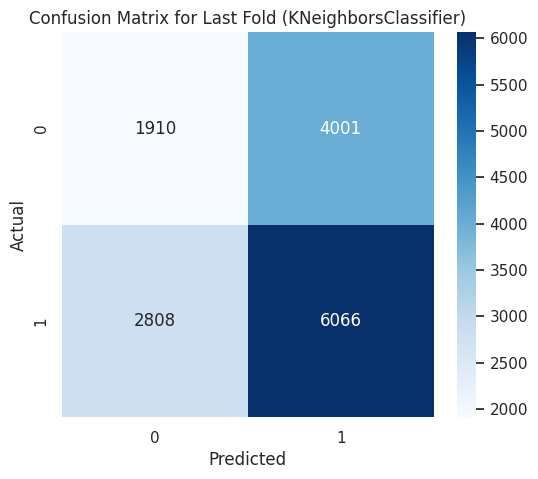

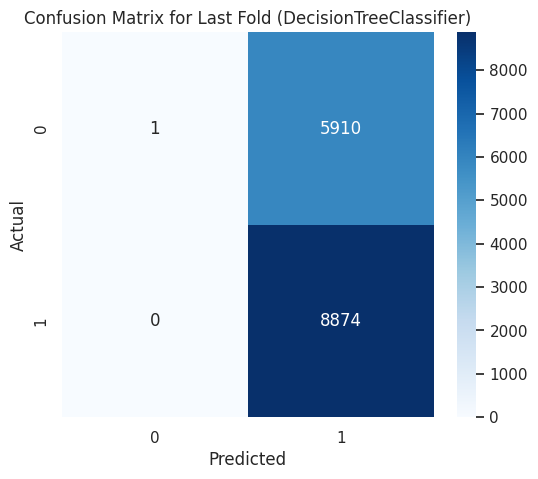

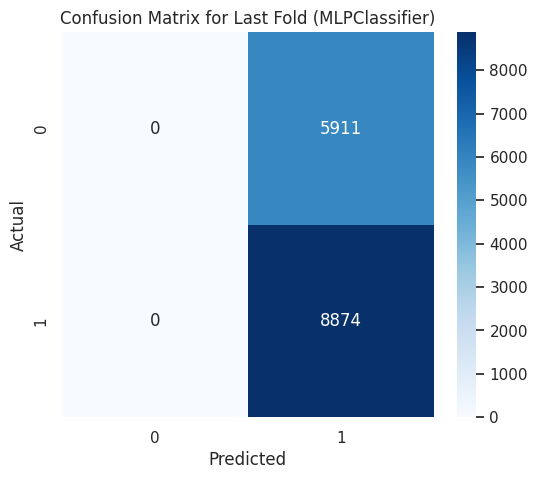

,Train,Validation
KNN,0.77+/-0.0,0.641+/-0.0
DT,0.75+/-0.0,0.749+/-0.0
NN,0.75+/-0.0,0.75+/-0.0


In [ ]:
keep_data_df=keep_data.copy()
show_results(df_all, keep_data_df, model_KNN, model_DT, model_NN)


## 4.2 Model Optimization

### 4.2.1 KNN

In [ ]:


def get_models_knn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    print(results_train)
    print(results_val)

    return results_train, results_val

In [ ]:
final_model_knn = KNeighborsClassifier(n_neighbors = 5)

### 4.2.2. Decision Trees


In [ ]:
# DO IT
def get_models_dt(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val

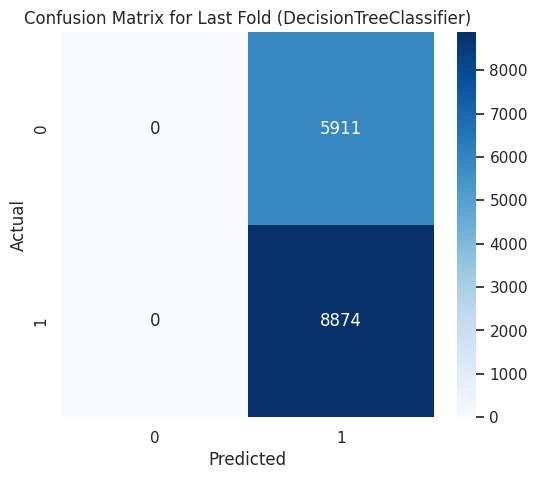

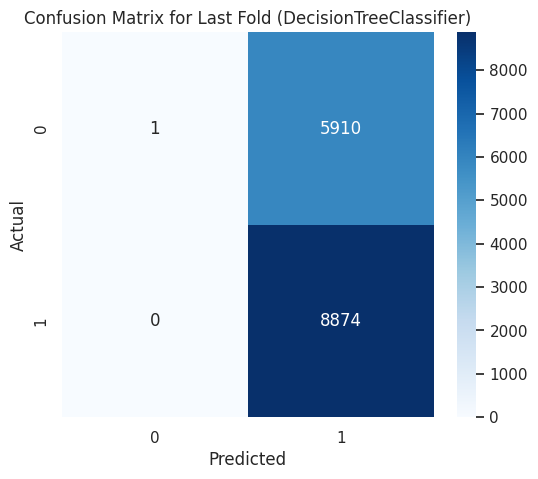

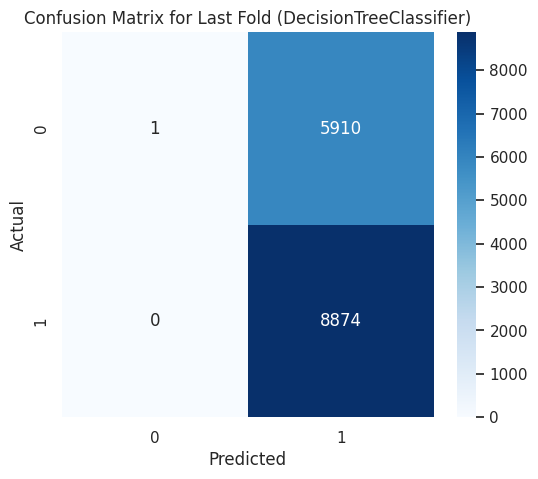

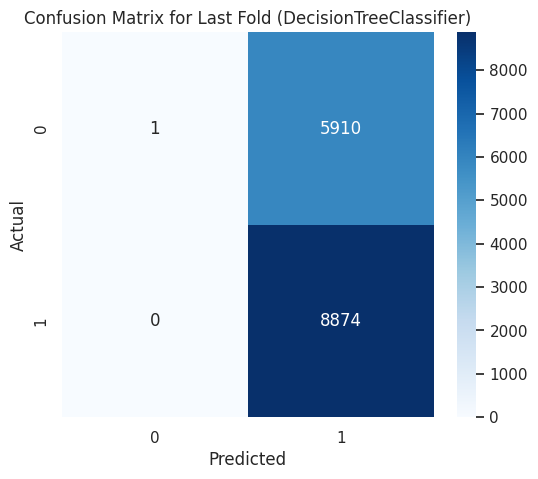

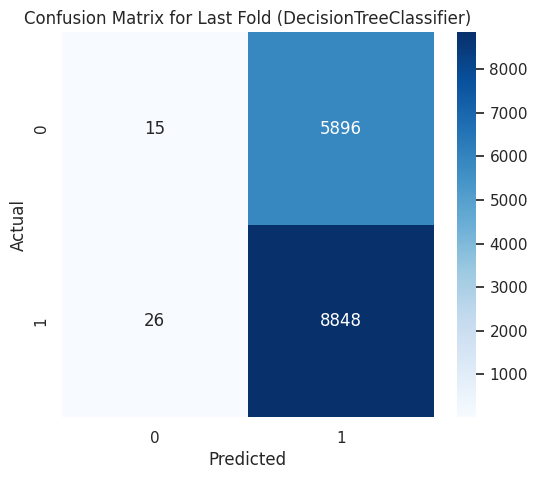

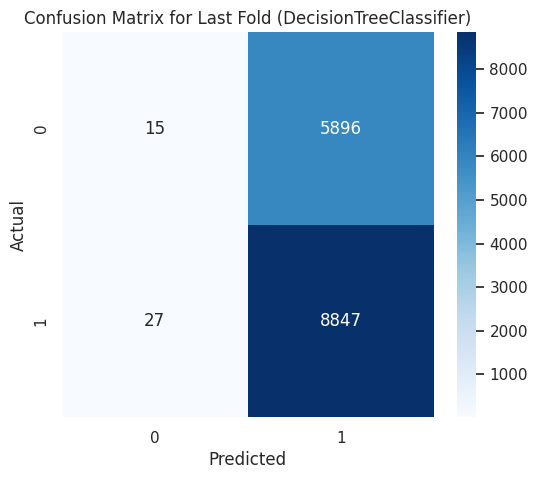

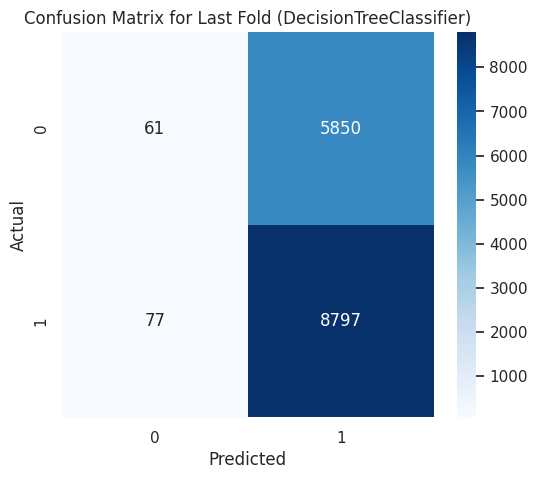

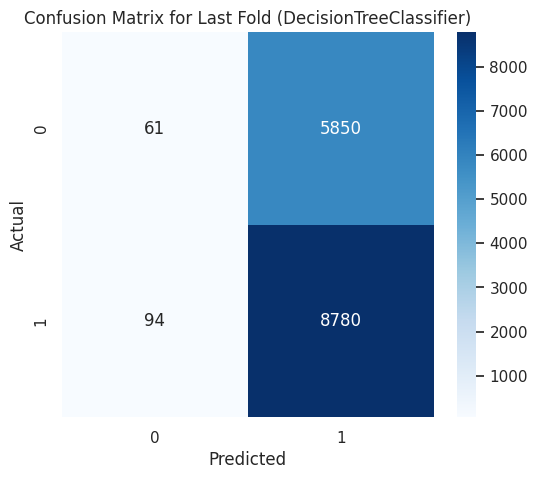

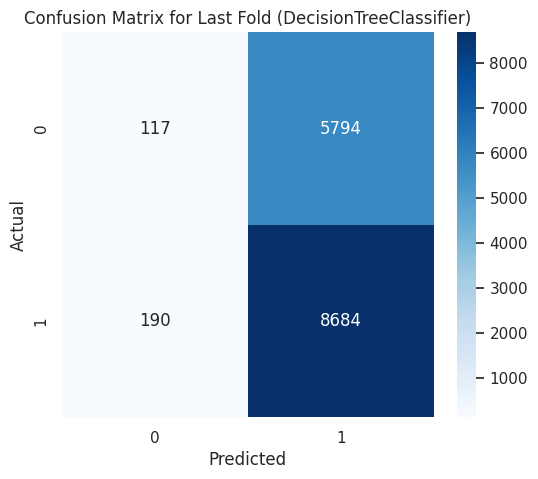

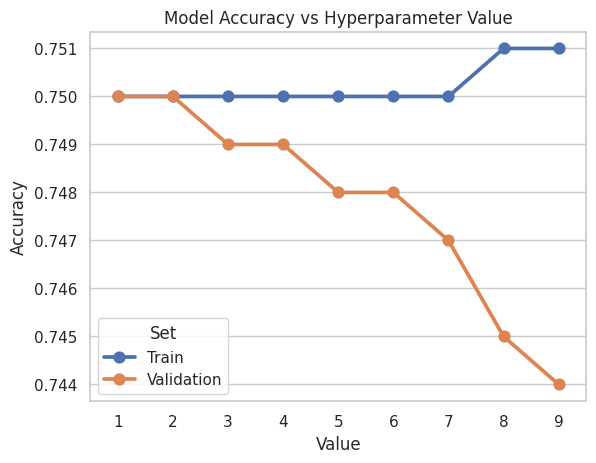

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample lists
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(keep_data_df, values_try)

# Create DataFrame in long-form
df_plot = pd.DataFrame({
    "Value": values_try * 2,
    "Accuracy": results_train + results_val,
    "Set": ["Train"] * len(values_try) + ["Validation"] * len(values_try)
})

# Plot
sns.pointplot(x="Value", y="Accuracy", hue="Set", data=df_plot)
plt.title("Model Accuracy vs Hyperparameter Value")
plt.show()


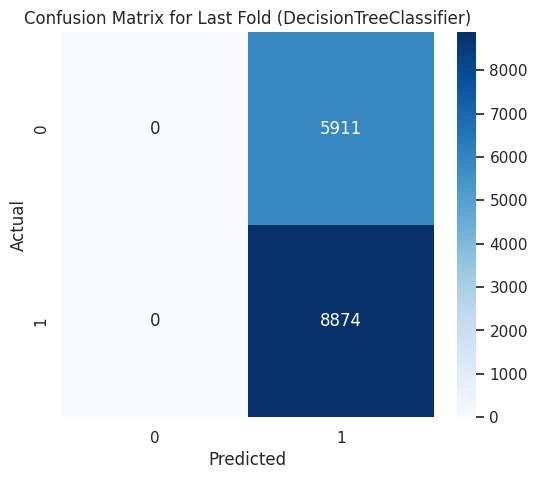

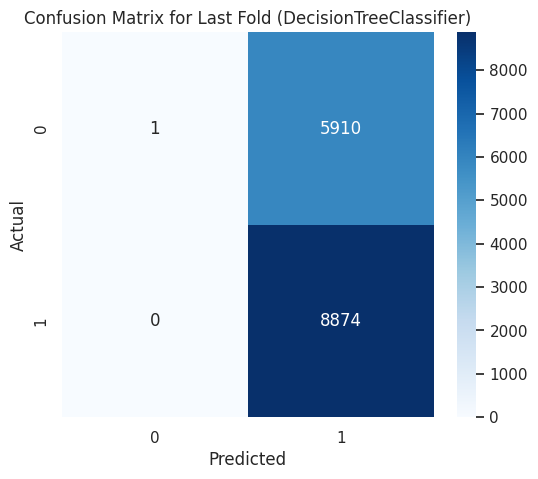

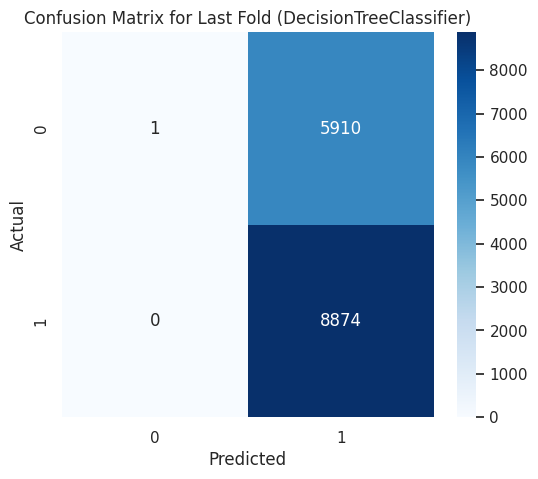

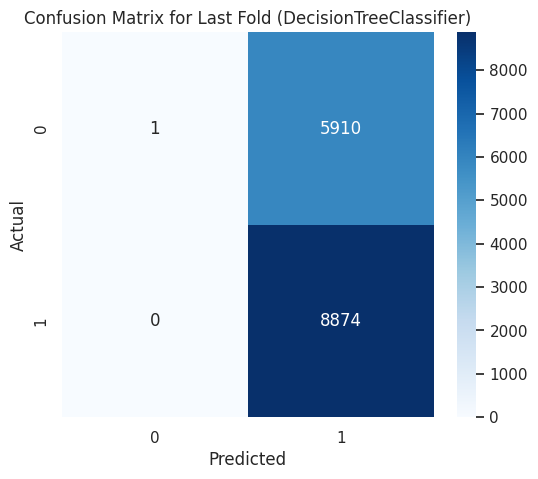

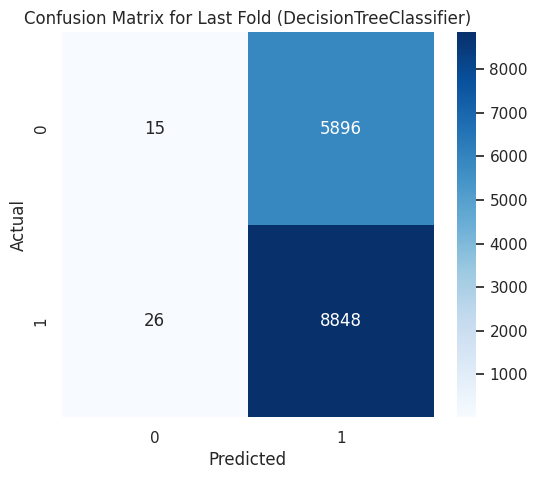

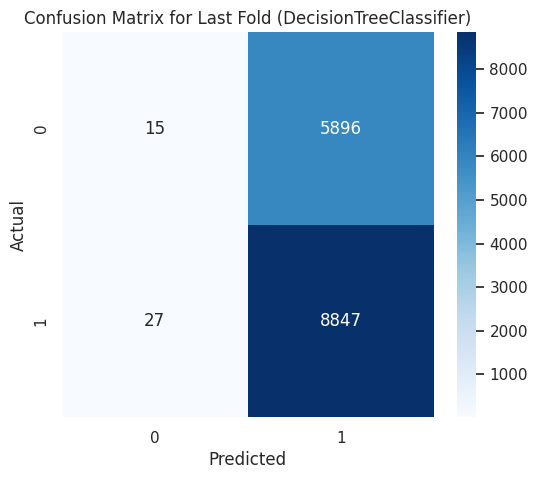

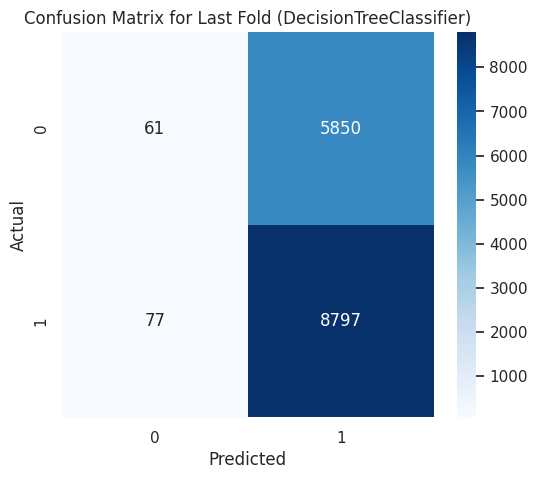

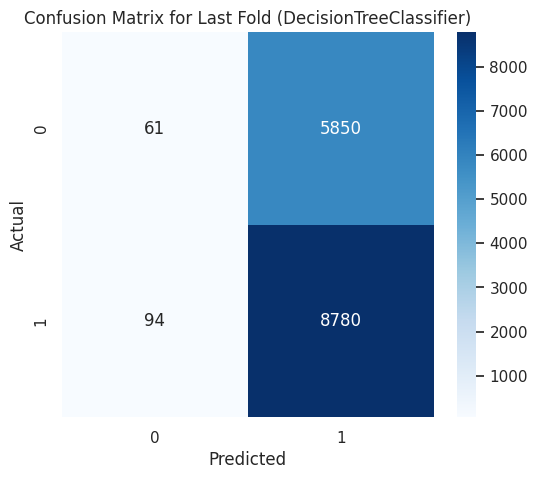

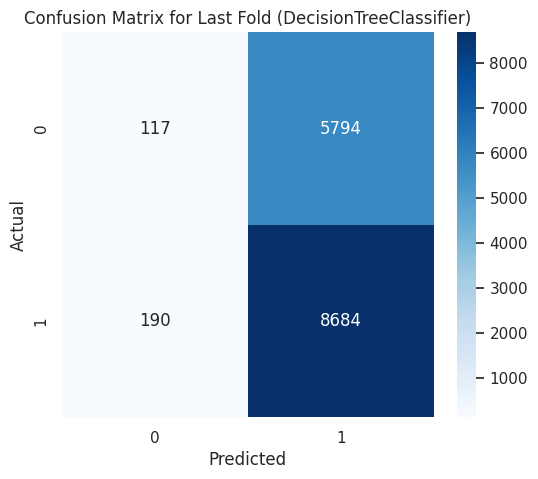

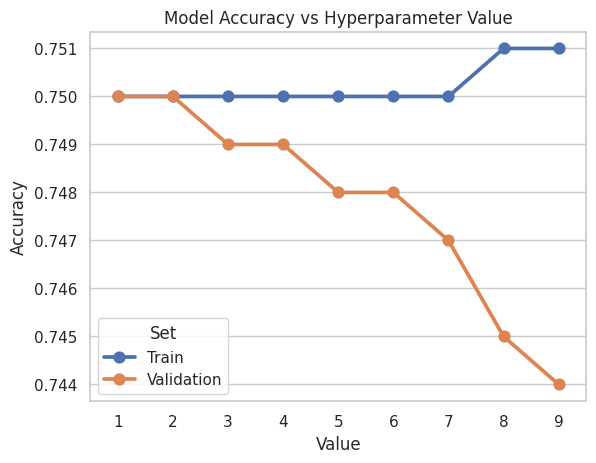

In [ ]:
import matplotlib.pyplot as plt

# Sample lists
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(keep_data_df, values_try)

# Create DataFrame in long-form
df_plot = pd.DataFrame({
    "Value": values_try * 2,
    "Accuracy": results_train + results_val,
    "Set": ["Train"] * len(values_try) + ["Validation"] * len(values_try)
})

# Plot
sns.pointplot(x="Value", y="Accuracy", hue="Set", data=df_plot)
plt.title("Model Accuracy vs Hyperparameter Value")
plt.show()


In [ ]:
# DO IT
final_model_dt = DecisionTreeClassifier(max_depth = 2, random_state = 99)
data = keep_data_df.copy()

X = data.drop(['Survival Prediction'], axis = 1)
y = data['Survival Prediction'].copy()

X = encode_data(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)


In [ ]:
from sklearn.tree import plot_tree as sk_plot_tree
import matplotlib.pyplot as plt

def plot_tree(model, feature_names=None, class_names=None, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    sk_plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.title("Decision Tree")
    plt.show()


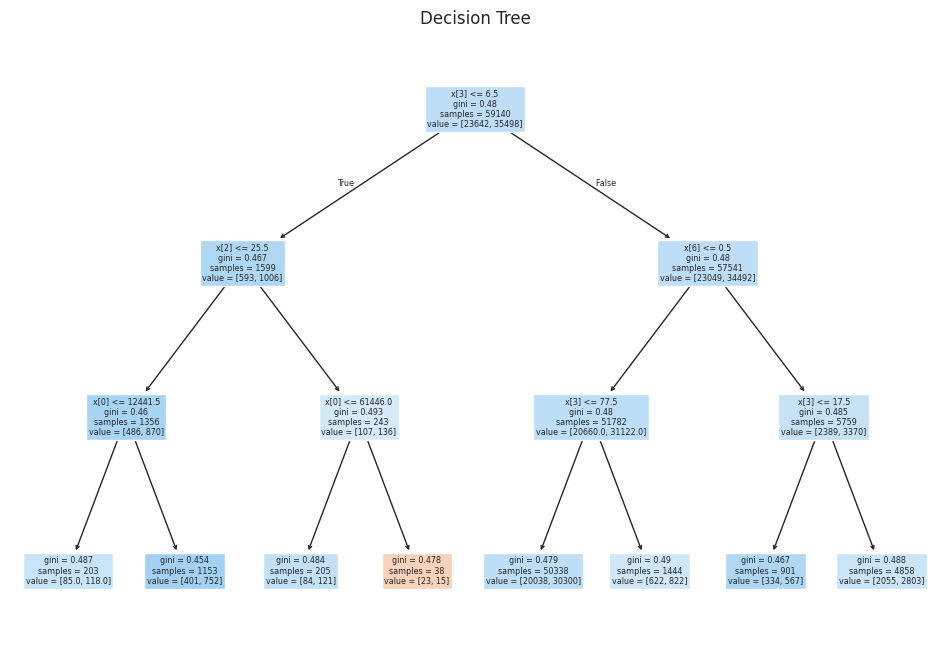

In [ ]:
# DO IT
dt_visual = DecisionTreeClassifier(max_depth = 3, random_state = 99).fit(X_train, y_train)

# DO IT
plot_tree(dt_visual)

### 4.2.3. Neural Networks


In [ ]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

### 4.2.4. RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Prepare your data
data = keep_data_df.copy()
X_data = data.drop(['Survival Prediction'], axis=1)
y_data = data['Survival Prediction'].copy()

X_data = encode_data(X_data)  # Your function
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

# Optimized, faster MLPClassifier
nn = MLPClassifier(
    max_iter=300,              # much faster than 2000
    early_stopping=True,       # stops if no improvement
    random_state=99
)

# Smaller, smarter parameter grid
parameter_space_random = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'learning_rate_init': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['adam'],                 # 'sgd' is much slower — omit for speed
    'activation': ['relu']             # 'logistic' is slow and rarely better
}

# Fast RandomizedSearchCV
random_search = RandomizedSearchCV(
    nn,
    param_distributions=parameter_space_random,
    n_iter=10,              # 10 random combinations
    cv=3,                   # fewer folds for speed
    scoring='f1',
    verbose=2,              # prints progress
    random_state=99,
    n_jobs=-1               # use all CPU cores
)

# Run it
random_search.fit(X_data, y_data)

# Show results
print("✅ Best Hyperparameters:", random_search.best_params_)
print("🏆 Best F1 Score:", round(random_search.best_score_, 3))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'relu'}
🏆 Best F1 Score: 0.75


### 4.2.5. GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV


parameter_space_grid = {
    'hidden_layer_sizes': [(280)],
    'learning_rate_init': [0.01, 0.005, 0.015],
    'learning_rate': ['constant'],
    'solver': ['sgd','adam'],
    'activation': ['relu']
}

# DO IT
grid_search = GridSearchCV(nn, parameter_space_grid, scoring='f1', return_train_score=True, cv=5)



grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



final_model_nn = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (280),
                               learning_rate = 'constant',
                               learning_rate_init = 0.015,
                               solver = 'adam', max_iter = 2000, random_state = 99)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 280, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best Score:  0.750183855768247


### 4.2.6. Select the winner model

#### 4.2.6.1. Compare the performance

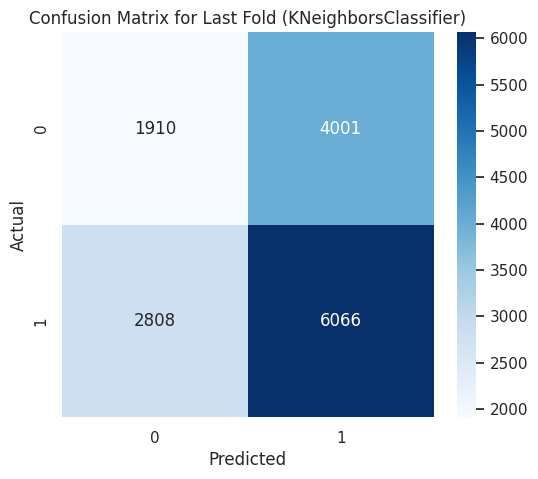

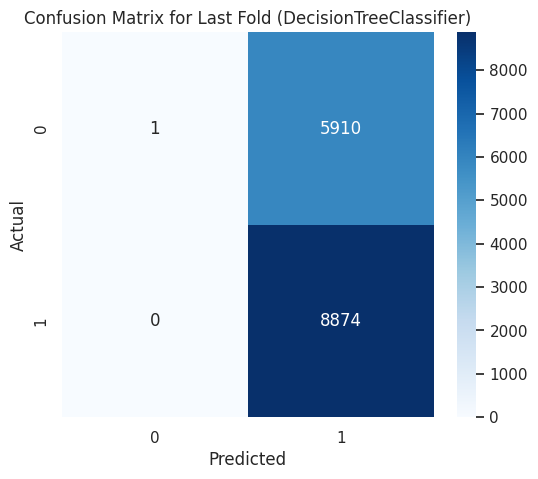

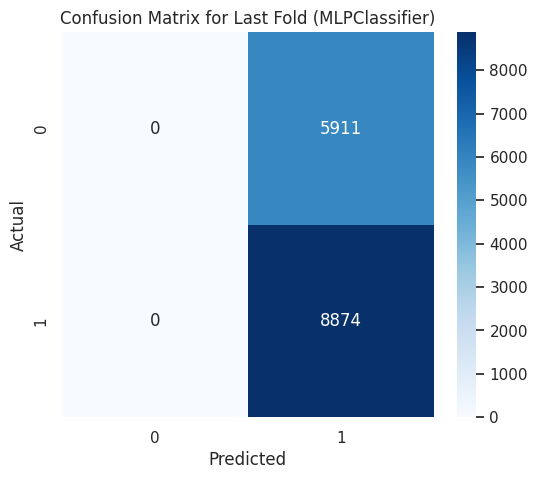

,Train,Validation
Best KNN,0.77+/-0.0,0.641+/-0.0
Best DT,0.75+/-0.0,0.75+/-0.0
Best NN,0.75+/-0.0,0.75+/-0.0


In [ ]:
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN','Best DT','Best NN'])
show_results(df_final_models, keep_data_df, final_model_knn, final_model_dt, final_model_nn)

#### 4.2.6.2. Plot a ROC Curve

In [ ]:
data = keep_data_df.copy()

X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [ ]:
X_data = encode_data(X_data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  train_size = 0.8,
                                                  random_state = 99,
                                                  stratify = y_data)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model_knn = final_model_knn.fit(X_train, y_train)
model_dt = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)

In [ ]:
# DO IT
prob_modelKNN = model_knn.predict_proba(X_val)
prob_modelDT =  model_dt.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)

In [ ]:
# DO IT
from sklearn.metrics import roc_curve

fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val, prob_modelDT[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])

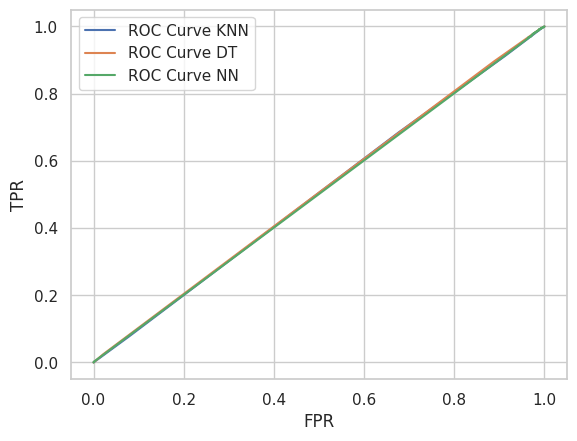

In [ ]:
# DO IT
plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
# DO IT
roc_auc_modelKNN = roc_auc_score(y_val, prob_modelKNN[:, 1])
roc_auc_modelDT = roc_auc_score(y_val, prob_modelDT[:, 1])
roc_auc_modelNN = roc_auc_score(y_val, prob_modelNN[:, 1])
print(roc_auc_modelKNN )
print(roc_auc_modelDT)
print(roc_auc_modelNN)

0.5027570750165007
0.5052194595418902
0.5012496443727498


# 5. Model Deployment

## 5.1 Import and transform the test data

In [ ]:
# DO IT
train = keep_data.copy()

X_train_fin = train.drop(['Survival Prediction'], axis = 1)
y_train_fin = train['Survival Prediction']
X_train_fin
keep_data
X_train_fin
keep_data
# Step 1: Load test data
test = pd.read_csv(path+'/patient_test_data.csv')



## 5.2 Obtain predictions on the test data from your final model

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier



# Step 1: Prepare data
train = keep_data.copy()
X = train.drop(['Survival Prediction'], axis=1)
y = train['Survival Prediction']

# Step 2: Identify categorical and numeric columns
cat_cols = ['Treatment Type']

# Step 3: Preprocessing pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[

        ('cat', categorical_transformer, cat_cols)
    ]
)

# Step 4: Create pipeline with KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Step 5: Fit model
knn_pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Treatment Type'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
test = pd.read_csv(path + '/patient_train_data.csv')

# Drop both columns safely in one go
test = test.drop( ['Survival Prediction'], axis=1, errors='ignore')

X_test = test  # Already cleaned
predict_proba_test = knn_pipeline.predict_proba(X_test)


## 5.3 Create a Dataframe containing the index of each row and its prediction

In [ ]:
# Step 1: Predict class probabilities
predict_proba_test = knn_pipeline.predict_proba(X_test)

# Step 2: Predict class labels (optional, if needed)
predict_label_test = knn_pipeline.predict(X_test)

# Step 3: Create DataFrame with ID and predictions
answer_df = pd.DataFrame({
    'PatientID': test['ID'],  # Replace with actual ID column name
    'Predicted_Label': predict_label_test,
    'Probability_Class_0': predict_proba_test[:, 0],
    'Probability_Class_1': predict_proba_test[:, 1]
})



In [ ]:
from google.colab import files

# Map 1 → 'Yes', 0 → 'No'
answer_df['Predicted_Label'] = answer_df['Predicted_Label'].map({1: 'Yes', 0: 'No'})

# Rename Columns
answer_df = answer_df.rename(columns={
    'PatientID': 'ID',
    'Predicted_Label': 'Survival Prediction'
})

# Select desired columns
answer_df = answer_df[['ID', 'Survival Prediction']]

# Save temporarily to Colab environment
answer_df.to_csv('answer.csv', index=False)

# Download to local machine
files.download('answer.csv')
